# Assignment 2: Milestone I Natural Language Processing
## Task 2&3
#### Student Name: Sowmiya Kumar
#### Student ID: s4040536


Environment: Python 3 and Jupyter notebook

Libraries used: please include all the libraries you used in your assignment, e.g.,:
* pandas
* re
* numpy
* matplotlib
* os
* nltk
* sklearn
* seaborn
* gensim

<span style="color: red;">Note:</span>  
Faced ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\sowmi\anaconda3\Lib\site-packages\scipy\linalg_init_.py) for scipy version from 1.13. So, downgraded the scipy version to 1.12.0.

## Introduction

This part aims to develop and evaluate machine learning models to classify clothing reviews based on their recommendation status, determining whether a review leads to a recommendation or not. The process involves two main tasks: generating feature representations from the review descriptions and building classification models using these representations.

The first task focuses on extracting meaningful feature representations from the description of each review. Three different types of features are generate

* * Bag-of-Words (Count Vector Representatio.
* * Unweighted word embedding using pre-trained model - FastTe.
* * Weighted TF-IDF embedding using pre-trained model - FastTe.xt

The Count Vector representation encodes each review as a sparse vector of word counts, capturing the frequency of terms based on a predefined vocabulary. The word embeddings, on the other hand, transform words into dense vector representations. One approach uses unweighted embeddings, where the document vector is derived from the sum or average of word embeddings. The other approach applies TF-IDF weighting to the word embeddings, giving more importance to significant words in each review. By the end of this task, three feature sets of each model are available for use.

In the second task, these feature sets are used to build machine learning models that classify the recommendation status of each review. The first part of this task involves comparing the different feature representations to determine which provides the best performance. Using a logistic regression model, models are trained and evaluated on each of the feature sets, measuring their performance in terms of accuracy, precision, recall, and F1-score. This comparison helps to identify the most effective representation for the review classification task.

The second part of the classification task explores whether adding more information to the model improves its accuracy. In this experiment, models trained only on the review title, only on the review description, and on both title and description combined are evaluated. This allows assessment of whether additional context, such as the review title, contributes to better classification performance. Throughout both tasks, 5-fold cross-validation is employed to ensure robust comparisons and to reduce the risk of overfitting. These tasks help determine which feature representations and data configurations provide the most accurate and reliable results for clothing review classification.

## Importing libraries 

In [3]:
import nltk
import os
import numpy as np
import pandas as pd

## Task 2. Generating Feature Representations for Clothing Items Reviews

In [5]:
#Load the processed data
data = pd.read_csv('processed.csv')
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"['high', 'hopes', 'wanted', 'work', 'initially..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"['jumpsuit', 'fun', 'flirty', 'fabulous', 'tim..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"['shirt', 'due', 'adjustable', 'front', 'tie',..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"['tracy', 'reese', 'dresses', 'petite', 'feet'..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"['basket', 'hte', 'person', 'store', 'pick', '..."


In [6]:
# summary statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19652 entries, 0 to 19651
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19652 non-null  int64 
 1   Age                      19652 non-null  int64 
 2   Title                    19652 non-null  object
 3   Review Text              19652 non-null  object
 4   Rating                   19652 non-null  int64 
 5   Recommended IND          19652 non-null  int64 
 6   Positive Feedback Count  19652 non-null  int64 
 7   Division Name            19652 non-null  object
 8   Department Name          19652 non-null  object
 9   Class Name               19652 non-null  object
 10  Processed_Review         19652 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.6+ MB


In [7]:
# Load the vocabulary from vocab.txt
vocab = {}
with open('vocab.txt', 'r') as f:
    for line in f:
        word, index = line.strip().split(':')
        vocab[word] = int(index)

#### Bag-of-words model - Count Vector Representation

The Bag-of-Words (BoW) model is a widely used approach in natural language processing that represents text data by converting words into numeric feature vectors. In this model, each document is represented by a vector where the elements correspond to the frequency or occurrence of words in the document. The main advantage of the BoW model is that it captures word occurrence patterns without considering the word order.

For this task, the Count Vector Representation is generated, where each feature in the vector corresponds to a word from the vocabulary (built in Task 1). The value in each vector position represents the number of times that word appears in a review. This allows for a numerical representation of the textual data, which is essential for further machine learning applications such as classification or clustering.

In [10]:
# importing count vector library
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with the vocabulary from previous task
cVectorizer = CountVectorizer(analyzer="word", vocabulary=vocab)

In [11]:
# Convert tokenized reviews into space-separated strings for CountVectorizer
review_string = data['Processed_Review'].apply(lambda tokens: ' '.join(eval(tokens)))
review_string

0        high hopes wanted work initially petite usual ...
1            jumpsuit fun flirty fabulous time compliments
2        shirt due adjustable front tie length leggings...
3        tracy reese dresses petite feet tall brand pre...
4        basket hte person store pick teh pale hte gorg...
                               ...                        
19647                 happy snag price easy slip cut combo
19648    reminds maternity clothes stretchy shiny mater...
19649                       worked glad store order online
19650    wedding summer medium waist perfectly long big...
19651    lovely feminine perfectly easy comfy highly re...
Name: Processed_Review, Length: 19652, dtype: object

In [12]:
# Generate the Count Vector representation for the reviews
count_features = cVectorizer.fit_transform(data['Processed_Review'])

# Display the shape of the document-by-word matrix
print(count_features.shape)

(19652, 7529)


In [13]:
len(vocab)

7529

The count vector representation has been correctly generated, with each row representing a review and each column representing the frequency of a particular word in that review. Following are the key inferences.
* The shape of the document-by-word matrix is (19652, 7529).
* This means that there are 19,652 reviews (documents) and 7,529 unique words (vocabulary) in the dataset.
* The length of the vocabulary (len(vocab)) is 7,529, which aligns perfectly with the number of columns in the document-by-word matrix. Each column corresponds to one unique word in the vocabulary.

In [15]:
# Validator function to ensure correctness
def validator(data_features, vocab, a_ind, data):
    print("Clothing ID:", data['Clothing ID'].iloc[a_ind])  # Print out the Clothing ID
    print("Age of Reviewer:", data['Age'].iloc[a_ind])  # Print out the Age of the Reviewer
    print("--------------------------------------------")
    print("Review Title:", data['Title'].iloc[a_ind])  # Print out the Review Title
    print("Original Review Text:", data['Review Text'].iloc[a_ind])  # Print out the Original Review Text
    print("Processed Review Tokens:", data['Processed_Review'].iloc[a_ind])  # Print out the Processed Tokenized Review
    print("--------------------------------------------\n")
    print("Vector Representation:\n")  # Printing the vector representation as format 'word:value'
    
    # Printing the word and its count/weight in the vectorized form
    for word, value in zip(vocab, data_features.toarray()[a_ind]):
        if value > 0:
            print(f"{word}:{value}", end=' ')
    print("\n")  # New line for separation

In [16]:
# Example usage for the first review
validator(count_features, vocab, 0, data)

Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Review Tokens: ['high', 'hopes', 'wanted', 'work', 'initially', 'petite', 'usual', 'found', 'outrageously', 'fact', 'zip', 'reordered', 'petite', 'medium', 'half', 'nicely', 'bottom', 'half', 'tight', 'layer', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper']
------------------------------

The results appear to be correct based on the comparison with the raw text. The processed tokens match the important keywords from the review, and the vector representation reflects their frequency in the text.

In [18]:
data['Processed_Review']

0        ['high', 'hopes', 'wanted', 'work', 'initially...
1        ['jumpsuit', 'fun', 'flirty', 'fabulous', 'tim...
2        ['shirt', 'due', 'adjustable', 'front', 'tie',...
3        ['tracy', 'reese', 'dresses', 'petite', 'feet'...
4        ['basket', 'hte', 'person', 'store', 'pick', '...
                               ...                        
19647    ['happy', 'snag', 'price', 'easy', 'slip', 'cu...
19648    ['reminds', 'maternity', 'clothes', 'stretchy'...
19649       ['worked', 'glad', 'store', 'order', 'online']
19650    ['wedding', 'summer', 'medium', 'waist', 'perf...
19651    ['lovely', 'feminine', 'perfectly', 'easy', 'c...
Name: Processed_Review, Length: 19652, dtype: object

Besides using CountVectorizer, another way to get the count list above is to use FreqDist

In [20]:
# Data conversion for using FreqDist
from nltk.probability import *
import ast  #evaluates the string representation of a list (e.g., "['word1', 'word2']") and converts it into an actual Python list 

# Convert string representations of lists back into actual lists
review_list = data['Processed_Review'].apply(lambda x: ast.literal_eval(x))

# extract the first review
first_review = review_list.iloc[0]
first_review

['high',
 'hopes',
 'wanted',
 'work',
 'initially',
 'petite',
 'usual',
 'found',
 'outrageously',
 'fact',
 'zip',
 'reordered',
 'petite',
 'medium',
 'half',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper']

In [21]:
# apply freq distribution
fdist = FreqDist(first_review)
fdist

FreqDist({'petite': 2, 'half': 2, 'layer': 2, 'net': 2, 'high': 1, 'hopes': 1, 'wanted': 1, 'work': 1, 'initially': 1, 'usual': 1, ...})

To verify the correctness of the count vector results, the FreqDist function from NLTK was used to compare the word frequencies in the processed reviews. By calculating word frequencies with FreqDist and matching them against the count vector output, it was confirmed that both methods produced identical results. This additional verification ensures the accuracy of the vectorization process.

#### Models based on word embeddings

Word embeddings are vector representations of words where similar words have similar representations in a high-dimensional space.

##### Loading Pre-Trained model and fine tuning - FastText
FastText is a word embedding model developed by Facebook's AI Research (FAIR) lab that builds upon Word2Vec but improves it by considering subword information. FastText treats words as composed of character n-grams, making it especially powerful for handling out-of-vocabulary (OOV) words, spelling variations, and rare words. This makes it ideal for working with datasets that contain domain-specific language, jargon, or misspellings, as it can generate word vectors even for unseen words by summing up the n-gram vectors. FastText is widely used for tasks such as text classification, sentiment analysis, and similarity calculations, making it highly suitable for tasks involving customer reviews like in this assessment.

In [25]:
# actual processed review data
data['Processed_Review']

0        ['high', 'hopes', 'wanted', 'work', 'initially...
1        ['jumpsuit', 'fun', 'flirty', 'fabulous', 'tim...
2        ['shirt', 'due', 'adjustable', 'front', 'tie',...
3        ['tracy', 'reese', 'dresses', 'petite', 'feet'...
4        ['basket', 'hte', 'person', 'store', 'pick', '...
                               ...                        
19647    ['happy', 'snag', 'price', 'easy', 'slip', 'cu...
19648    ['reminds', 'maternity', 'clothes', 'stretchy'...
19649       ['worked', 'glad', 'store', 'order', 'online']
19650    ['wedding', 'summer', 'medium', 'waist', 'perf...
19651    ['lovely', 'feminine', 'perfectly', 'easy', 'c...
Name: Processed_Review, Length: 19652, dtype: object

In [26]:
# variable containing tokenized reviews as space-separated strings
review_string

0        high hopes wanted work initially petite usual ...
1            jumpsuit fun flirty fabulous time compliments
2        shirt due adjustable front tie length leggings...
3        tracy reese dresses petite feet tall brand pre...
4        basket hte person store pick teh pale hte gorg...
                               ...                        
19647                 happy snag price easy slip cut combo
19648    reminds maternity clothes stretchy shiny mater...
19649                       worked glad store order online
19650    wedding summer medium waist perfectly long big...
19651    lovely feminine perfectly easy comfy highly re...
Name: Processed_Review, Length: 19652, dtype: object

In [27]:
from gensim.models.fasttext import FastText
from gensim.models import KeyedVectors
# Define a function to fine-tune FastText model
def fine_tune_fasttext(review_string, vector_size, window, min_count, workers, output_corpus_file,seed):
    """
    Fine-tune a FastText model based on tokenized review strings.
    
    Args:
        review_string (list of lists): Tokenized reviews (or titles or other text data).
        vector_size (int): Dimension of the word vectors.
        window (int): Maximum distance between the current and predicted word within a sentence.
        min_count (int): Ignores all words with total frequency lower than this.
        workers (int): Number of worker threads to train the model.
        output_corpus_file (str): The file where the processed text will be saved for training.
        seed (int): Random seed for reproducibility.
        
    Returns:
        fasttext_wv: Trained FastText word vectors (KeyedVectors).
    """

    # Initialize the FastText model with the given parameters
    fasttext_model = FastText(vector_size=vector_size, window=window, min_count=min_count, workers=workers)

    # Build the vocabulary from the processed text corpus
    fasttext_model.build_vocab(corpus_file=output_corpus_file)

    # Train the FastText model on the corpus
    fasttext_model.train(
        corpus_file=output_corpus_file, 
        epochs=fasttext_model.epochs,
        total_examples=fasttext_model.corpus_count, 
        total_words=fasttext_model.corpus_total_words
    )

    # Return the trained FastText word vectors (KeyedVectors)
    return fasttext_model.wv


In [28]:
# fine-tuning on review text

# Save the tokenized text to a file in a space-separated format
corpus_file = './processed.txt'
with open(corpus_file, 'w') as f:
    for tokens in review_string:
            f.write(tokens + '\n')

#review_string = data['Processed_Review'] 
fasttext_wv = fine_tune_fasttext(data['Processed_Review'], 100, 5, 1, 4, corpus_file,seed=42 )

In [29]:
fasttext_wv

In [30]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('dress' in fasttext_wv.key_to_index)  # Word is out of vocabulary
print('comfortable' in fasttext_wv.key_to_index)

# Example: Get the vector for the word 'dress'
vector_dress = fasttext_wv['dress']  # Even OOV words have vectors in FastText
print(f"Vector for 'dress': {vector_dress}")

# Example: Similarity between two words 'dress' and 'skirt'
similarity = fasttext_wv.similarity('dress', 'skirt')
print(f"Similarity between 'dress' and 'skirt': {similarity}")

False
False
Vector for 'dress': [-0.63822746 -0.50548965 -0.01002684  0.05010195  0.2605087  -0.8321854
  0.07701154  0.34507686  0.7644982  -0.06322213  0.21414982 -0.5628496
  0.47446278 -0.4268689   1.208793    0.5675815   0.03245872 -0.0529689
  0.48485205 -0.7744377  -0.05766825 -0.12382077 -0.215152    0.3480908
 -0.11951662 -0.48309988 -0.056029   -0.5273822  -0.6814457  -0.4117561
  0.65728253  0.774617   -0.65012586  0.11917644  0.02164344  1.2093467
  0.7547364   0.07284246 -0.80922836  0.02244784  0.22518015 -1.2182486
 -0.19335495 -0.5221011  -0.563323   -0.31638542 -0.6399824   0.48388523
  1.6990507   1.011659    0.33955973  0.67117244  0.40448204 -0.04211702
  0.37274233 -0.3431098  -1.2840049  -0.30579987 -0.02281203 -0.09355397
  0.7728225   0.5881389   0.18963613  0.40523311 -0.11806289 -0.19621322
  0.5989825  -0.90608007  0.19182482  1.2586797  -0.55872786 -0.6832413
 -0.35474882 -0.88553137  1.3924897  -0.3845213  -0.09381388 -0.85914004
 -0.36107963  1.3961796  -0

During Task 1, the preprocessing step involved removing the top 20 most frequent words based on document frequency, which included common terms like "dress". As a result, the preprocessed data no longer contains the word "dress", but instead includes variations like "dresses", "dress's", and other related forms. This explains why the FastText model doesn't find "dress" in its vocabulary when tested.

Additionally, words like "comfortable" are also not present in their base form, though variants like "uncomfortable" may exist. The absence of these base forms impacts the ability of FastText to provide a direct vector for these words.

The FastText model, however, can still generate approximate vectors for unseen words based on subword information.

In [32]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('super' in fasttext_wv.key_to_index)
print('lovely' in fasttext_wv.key_to_index)

# Example: Similarity between two words 'super' and 'lovely'
similarity = fasttext_wv.similarity('super', 'lovely')
print(f"Similarity between 'super' and 'lovely': {similarity}")

True
True
Similarity between 'super' and 'lovely': 0.510088324546814


In [33]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('strong' in fasttext_wv.key_to_index)
print('weak' in fasttext_wv.key_to_index)

# Example: Similarity between two words 'strong' and 'weak'
similarity = fasttext_wv.similarity('strong', 'weak')
print(f"Similarity between 'super' and 'lovely': {similarity}")

True
True
Similarity between 'super' and 'lovely': 0.10104105621576309


In [34]:
#Find most similar words to a given word
similar_words = fasttext_wv.most_similar('dress', topn=10)
print("Most similar words to 'dress':")
for word, score in similar_words:
    print(f"{word}: {score}")

Most similar words to 'dress':
dresss: 0.9965518116950989
dress-up: 0.9942616820335388
dress's: 0.9924754500389099
dressy: 0.9774052500724792
dresse: 0.9760527014732361
dressier: 0.9599058628082275
dressed: 0.9575570225715637
dressmaker: 0.956902027130127
dres: 0.9561390280723572
dre: 0.9534730911254883


In [35]:
#Find most similar words to a given word
similar_words = fasttext_wv.most_similar('super', topn=10)
print("Most similar words to 'super':")
for word, score in similar_words:
    print(f"{word}: {score}")

Most similar words to 'super':
super-hot: 0.9610714912414551
superb: 0.9434386491775513
super-soft: 0.9274036288261414
super-tiny: 0.9198096990585327
superior: 0.9146403670310974
supima: 0.9067333936691284
outweigh: 0.8846021890640259
duper: 0.8738036155700684
thickness: 0.8638707399368286
weighty: 0.8630309700965881


The results from the FastText model demonstrate its capability to effectively capture word similarities, even for words that are not explicitly present in the dataset. This showcases the model's strength in handling morphological variations.

For the words which exists in dataset, the similarity score between 'super' and 'lovely' is 0.519, and between 'strong' and 'weak' is 0.103, indicating that 'super' and 'lovely' are more contextually related in the dataset compared to 'strong' and 'weak.' Higher similarity scores indicate a stronger contextual relationship between the words.

Additionally, querying the model for words most similar to 'dress' and 'super' returned relevant results, such as 'dress-up,' 'dresses,' 'super-hot,' and 'superb,' further demonstrating the FastText model's ability to capture nuanced word relationships.


In [37]:
#save the model
fasttext_wv.save("fastText.model")

##### Generation using weighted vector -> TF-IDF Vectors

After completing text preprocessing, each document must be converted into a numeric representation suitable for input into various NLP and text mining algorithms. For instance, classification algorithms like Support Vector Machines require structured numerical data and do not accept free-form text. A widely used structured representation is the vector-space model, which represents each text or article as a vector, where the elements indicate the occurrence of words within that text.

Using a collection of documents and a predefined vocabulary (a list of words found in those documents), we can calculate a vector representation for each document. One popular method for creating this representation is the TF-IDF (Term Frequency-Inverse Document Frequency) vector. This weighted vector is composed of float values, where each entry corresponds to a word and its associated weight, reflecting the importance of that word to the document. The TF-IDF vector is one of the most common weighted representations utilized in natural language processing.

Weighted TF-IDF Vector Representation Steps:

1. Generating TF-IDF Features:
    Using the vocabulary built in the previous steps, where each line corresponds to a word in the format index, word, TF-IDF values are computed for each document. These values capture the importance of each word within the document relative to the entire corpus.

2. Creating Word
    Mappings:
        For each tokenized word in a document, a mapping is created between the word and its corresponding TF-IDF weight. The format for each document would be: 'word_index: weight word_index: weight ...', where word_index refers to the position of the word in the vocabulary, and weight is the TF-IDF score for that word.

3. Generating TF-IDF Weighted Document Embeddings:
    The word embeddings (e.g., from FastText or Word2Vec) are combined with the TF-IDF weights to generate a final document-level representation. Each word vector is scaled by its TF-IDF score, and then these weighted word vectors are summed together to form a single vector representing the entire document.

4. Final Representation:
    The result is a document vector where the words’ importance (based on TF-IDF) is incorporated into their semantic embeddings, providing a weighted and contextually relevant representation of the document for downstream tasks like classification or clustering.

In [40]:
#Step 1 - Generating TF-IDF Features
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TfidfVectorizer with the vocabulary from Task 1
tVectorizer = TfidfVectorizer(analyzer="word", vocabulary=vocab)

# Generate the TF-IDF vector representation for all reviews
tfidf_features = tVectorizer.fit_transform(review_string)

# Display the shape of the document-by-word matrix
print(tfidf_features.shape)

(19652, 7529)


In [41]:
len(vocab)

7529

The weighted vector representation has been correctly generated, with each row representing a review and each column representing the frequency of a particular word in that review. Following are the key inferences.
* 
The shape of the document-by-word matrix is (19652, 7529)* .
This means that there are 19,652 reviews (documents) and 7,529 unique words (vocabulary) in the datase* t.
The length of the vocabulary (len(vocab)) is 7,529, which aligns perfectly with the number of columns in the document-by-word matrix. Each column corresponds to one unique word in the vocabulary.

In [43]:
# Example usage to validate the TF-IDF vector for the first review (index 0)
validator(tfidf_features, vocab, 0, data)

Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Review Tokens: ['high', 'hopes', 'wanted', 'work', 'initially', 'petite', 'usual', 'found', 'outrageously', 'fact', 'zip', 'reordered', 'petite', 'medium', 'half', 'nicely', 'bottom', 'half', 'tight', 'layer', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper']
------------------------------

The results from the TF-IDF weighted representation show that words within the review have been effectively assigned weights based on their importance within the document relative to the entire dataset. Higher values indicate words that carry more significance for this particular review. For example, words like "bottom," "cheap," and "layer" have relatively high weights, showing that these terms are more relevant in this specific review.

This demonstrates the ability of the TF-IDF model to emphasize key words that distinguish each review, helping to highlight the most contextually important words for further analysis or classification tasks. The model has successfully captured both frequent and unique words, balancing their importance through the TF-IDF weighting scheme.er:1 

In [45]:
# Get the feature names (words) from the TfidfVectorizer
feature_names = tVectorizer.get_feature_names_out()

#Step 2- Create word mapppings
# Function to generate TF-IDF word:weight mapping for each document
def doc_wordweights(tfidf_matrix, feature_names):
    tfidf_weights = []
    
    for i in range(tfidf_matrix.shape[0]):  # Iterate through each document
        word_weight_dict = {}
        for j in range(tfidf_matrix.shape[1]):  # Iterate through each word in the vocabulary
            if tfidf_matrix[i, j] > 0:  # If the word has a non-zero TF-IDF score
                word_weight_dict[feature_names[j]] = tfidf_matrix[i, j]  # Map the word to its TF-IDF score
        tfidf_weights.append(word_weight_dict)
    
    return tfidf_weights

# Generate the word:weight mappings for the entire dataset
tfidf_weights = doc_wordweights(tfidf_features, feature_names)

In [46]:
tfidf_weights[0]

{'bottom': 0.10490905048781156,
 'cheap': 0.13834681733551207,
 'design': 0.0981905331970358,
 'directly': 0.22042366265962396,
 'fact': 0.14687037381367216,
 'flaw': 0.1869368578273477,
 'found': 0.11016820762903567,
 'half': 0.29992142257858656,
 'high': 0.10509713403953778,
 'hopes': 0.16844705121993458,
 'imo': 0.19309847172209627,
 'initially': 0.17097793161240013,
 'layer': 0.2738967869996706,
 'layers': 0.16401760637664864,
 'major': 0.19468911285051188,
 'medium': 0.09045659947118836,
 'net': 0.4867876227942154,
 'nicely': 0.11400095142158763,
 'outrageously': 0.2567966207221875,
 'petite': 0.17993461419688872,
 'reordered': 0.20116611478729465,
 'sewn': 0.15731076193390778,
 'tight': 0.09944270371682062,
 'usual': 0.1108979967093157,
 'wanted': 0.10688230992054923,
 'work': 0.08942754431903749,
 'zip': 0.15790936302533073,
 'zipper': 0.13796655643162234}

In [47]:
# Step 3: Generate TF-IDF weighted document embeddings using the FastText word vectors
def gen_docVecs_weighted(wv, tk_txts, tfidf=[]):
    docs_vectors = []

    for i in range(len(tk_txts)):  # Loop through each document
        tokens = list(set(tk_txts[i]))  # Get the unique tokens for each document
        temp = np.zeros(wv.vector_size)  # Initialize an empty vector with the size of the FastText word embeddings
        total_weight = 0
        
        for word in tokens:
            if word in wv.key_to_index:  # Check if the word is in the FastText vocabulary
                word_vec = wv[word]  # Get the word's embedding from FastText
                if tfidf != [] and word in tfidf[i]:
                    word_weight = float(tfidf[i][word])  # Get the word's TF-IDF weight if it exists
                else:
                    word_weight = 1  # Default to weight of 1 if TF-IDF is not provided

                temp += word_vec * word_weight  # Accumulate the weighted word vector
                total_weight += word_weight

        # Normalize by the total weight if it's not zero to avoid empty vectors
        if total_weight != 0:
            temp = temp / total_weight

        docs_vectors.append(temp)  # Append the document vector to the list

    return np.array(docs_vectors)

# Step 4: Generate the final TF-IDF weighted document vectors
tfidf_weighted_doc_vectors = gen_docVecs_weighted(fasttext_wv, review_list, tfidf_weights)

In [48]:
tfidf_weighted_doc_vectors.shape

(19652, 100)

In [49]:
tfidf_weighted_doc_vectors[:5]

array([[-2.69605185e-01,  6.96514438e-02,  3.21422809e-02,
         2.04060710e-01,  1.31167831e-01,  1.91763003e-01,
         1.70129599e-01,  9.14766157e-02,  7.96497744e-02,
        -1.77343086e-01, -2.89446597e-01,  2.60666707e-01,
        -1.18409828e-01,  8.29682923e-02, -2.85631519e-02,
         5.40282890e-03,  2.70171257e-01, -4.24504777e-01,
        -1.00694993e-01, -4.19557558e-02,  5.44425558e-02,
        -1.63135471e-01, -3.01195098e-01,  1.03745593e-01,
        -4.51726191e-01, -2.99158171e-01, -3.25429803e-01,
        -2.08856858e-01,  4.39986423e-01, -4.32814432e-01,
         8.61067720e-02, -3.63291634e-01, -2.54822190e-01,
        -3.19425631e-02, -4.20076073e-02,  3.93389559e-01,
        -1.04043204e-02, -1.89284676e-02, -3.39481431e-01,
        -1.76934277e-01,  5.01205955e-01, -6.25918942e-01,
        -5.74625857e-02, -1.49543364e-01, -5.36794366e-01,
        -5.43814514e-01, -1.89942076e-01, -6.52673638e-02,
         3.36898900e-01,  9.98782667e-02,  1.65775767e-0

##### Unweighted vector representation using FastText

This part is to generate unweighted document vectors for each clothing review using a pre-trained FastText language model. The process involves converting each review into a numerical representation by summing the word embeddings corresponding to the words in the review. The key steps are as follows:

* Embedding Retrieval: Using the FastText model, we retrieve the embedding for each word in the pre-tokenized reviews. If the word is not present in the FastText vocabulary, it is ignored.
* Summing Word Vectors: The word vectors for each review are summed to create a single document vector representing the entire review.
* Handling Empty Documents: If a review contains no words present in the FastText vocabulary, a zero vector is assigned as its representation.
* Efficiency: Numpy array is used over Pandas dataframe for faster processing, reducing execution time from 630 to 67 seconds.

In [51]:
# Define the function to generate unweighted document vectors

def gen_docVecs_unw(wv, tk_txts):  # generate vector representation for documents
    vector_size = wv.vector_size  # get the size of word vectors
    docs_vectors = []  # list to store document vectors (instead of DataFrame)

    for tokens in tk_txts:
        temp = []  # list to store word vectors of one document

        for word in tokens:  # loop through each word in the document
            try:
                word_vec = wv[word]  # get the word vector if it exists in embeddings
                temp.append(word_vec)  # append the word vector to the list
            except KeyError:
                pass  # if word not found in the vocab, skip it

        if temp:
            # Sum up all the word vectors for the document to get the document vector
            doc_vector = np.sum(np.array(temp), axis=0)
        else:
            # Handle empty documents by assigning a zero vector
            doc_vector = np.zeros(vector_size)

        docs_vectors.append(doc_vector)  # append document vector to list

    # Convert list of document vectors to a NumPy array (final result)
    return np.array(docs_vectors)

# Generating unweighted vector
doc_vec_unweighted = gen_docVecs_unw(fasttext_wv, data['Processed_Review'])

# Display the first few document vectors (as NumPy arrays)
doc_vec_unweighted[:5]


array([[-0.8102956 , -0.2780482 , -0.15200451,  1.3454684 ,  0.7317974 ,
        -0.13602342, -0.7256151 ,  0.88552654,  0.30694804,  0.7476123 ,
         0.18879405,  0.3788395 ,  0.6466345 , -1.1106449 , -0.25891563,
        -0.33201048,  0.69628704, -0.09741507, -1.020637  ,  0.07130888,
         0.1779675 ,  0.15783088, -0.2741983 ,  1.0596826 , -1.1228198 ,
        -0.51149935, -0.50873834, -0.3391382 ,  0.20503923, -0.8460653 ,
        -0.20579413, -0.58680195,  0.44862008, -0.36172765,  0.4509672 ,
         1.5184635 ,  0.6021173 , -0.3189714 , -0.29759222,  0.740519  ,
         0.03690315,  0.11299049, -1.1735591 ,  0.8720925 , -0.12096841,
         0.12270288,  0.27709177,  0.4666055 ,  0.9174187 ,  0.64387876,
         0.38102373,  1.3749328 ,  0.19433014, -0.02611824,  0.32999623,
        -0.5337117 , -0.035847  , -0.8028446 , -0.33507842,  1.0687541 ,
         1.1319288 , -0.8847309 ,  0.9342739 , -0.4908643 , -0.40649608,
         0.8609036 ,  0.53132737,  0.5369871 , -0.4

In [52]:
doc_vec_unweighted.shape

(19652, 100)

### Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [54]:
# Save the count vector representation to a txt file in the required format

def save_count_vectors(filename, count_features, vocab, data):
    # Get the vocabulary word to index mapping (inverse of vocab)
    #inv_vocab = {v: k for k, v in vocab.items()}  # Reverse the vocab mapping to map integer to word

    with open(filename, 'w') as f:
        for i in range(count_features.shape[0]):  # Loop through each review
            # Write the Clothing ID for the current review
            f.write(f"#{data['Clothing ID'].iloc[i]}, ")
            
            # Get the non-zero elements in the count vector (sparse matrix row)
            row = count_features[i]
            indices = row.indices  # Get the word indices where the count is non-zero
            counts = row.data  # Get the corresponding count values

            # Construct the 'word_integer_index:word_freq' string for each non-zero element
            count_vector_str = ", ".join([f"{idx}:{counts[j]}" for j, idx in enumerate(indices)])

            # Write the sparse vector representation to the file
            f.write(count_vector_str + "\n")

# save the count vectors in the required format
save_count_vectors('count_vectors.txt', count_features, vocab, data)


## Task 3. Clothing Review Classification

#### Q1: Language model comparison

Compare the performance of different feature representations (generated in Task 2) using a machine learning model like logistic regression.

Feature Representations to Compare:

* Count Vector Representation (Bag-of-Words)
* Unweighted FastText Representation
* TF-IDF Weighted FastText Representation

Given that the 'Review Text' column in the dataset has already been preprocessed, a logistic regression model will be built to classify whether an item is recommended based on the provided reviews. The model will be trained using each of the feature representations created in Task 2. K-fold cross-validation will be used for evaluation. Model performance will be assessed using metrics such as accuracy, F1-score, precision, and recall.

In [58]:
# Label distribution
data['Recommended IND'].value_counts()

Recommended IND
1    16077
0     3575
Name: count, dtype: int64

This distribution indicates that the dataset is imbalanced, with approximately 82% recommended and 18% not recommended reviews.

In [60]:
# Classification using Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define a method for model evaluation with confusion matrix and metrics
def evaluate_model(feature_sets, labels):
    # Initialize the logistic regression model
    model = LogisticRegression(max_iter=1000)
    
    # Perform 5-Fold Cross Validation
    kf = StratifiedKFold(n_splits=5)
    
    for feature_name, feature_data in feature_sets.items():
        print(f"Evaluating model using {feature_name}...")
        
        # Perform cross-validation and get predicted labels
        predicted_labels = cross_val_predict(model, feature_data, labels, cv=kf)
        
        # Calculate evaluation metrics
        accuracy = accuracy_score(labels, predicted_labels)
        precision = precision_score(labels, predicted_labels)
        recall = recall_score(labels, predicted_labels)
        f1 = f1_score(labels, predicted_labels)
        
        # Print the results for this feature set
        print(f"{feature_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")
        
        # Generate the confusion matrix
        cm = confusion_matrix(labels, predicted_labels)
        
        # Plot the confusion matrix
        plt.figure(figsize=(6,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended', 'Recommended'], yticklabels=['Not Recommended', 'Recommended'])
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title(f'Confusion Matrix for {feature_name}')
        plt.show()


Evaluating model using count_vector...
count_vector - Accuracy: 0.8753, Precision: 0.9032, Recall: 0.9492, F1 Score: 0.9257


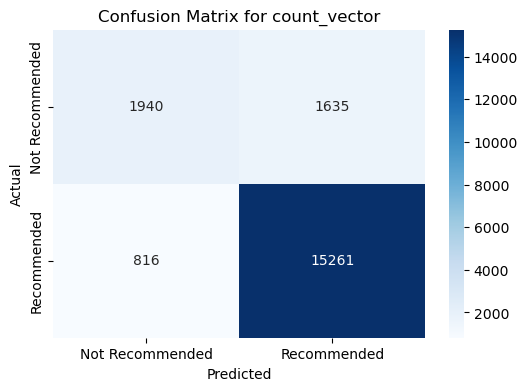

Evaluating model using unweighted_fasttext...
unweighted_fasttext - Accuracy: 0.8182, Precision: 0.8200, Recall: 0.9965, F1 Score: 0.8997


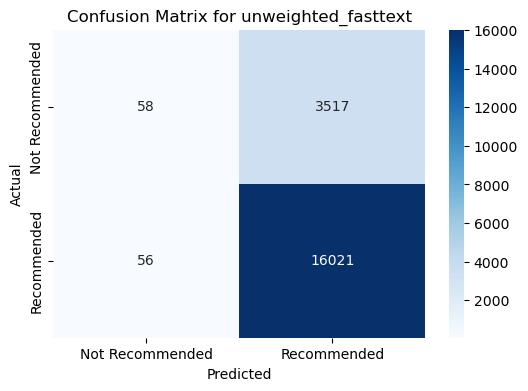

Evaluating model using tfidf_fasttext...
tfidf_fasttext - Accuracy: 0.8432, Precision: 0.8615, Recall: 0.9631, F1 Score: 0.9095


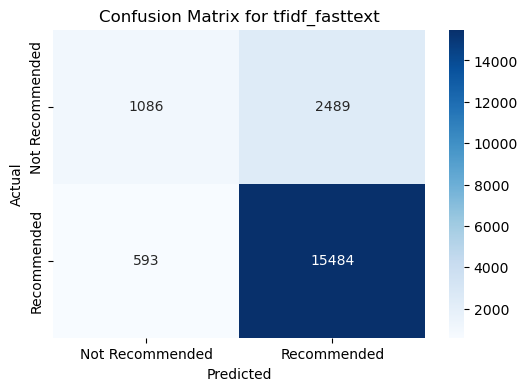

In [61]:
# count vector is converted to a dense matrix (as it's in sparse format)
count_vector_dense = count_features.toarray() if hasattr(count_features, 'toarray') else count_features

# Feature sets for the logistic regression model
feature_sets = {
    'count_vector': count_vector_dense,               
    'unweighted_fasttext': doc_vec_unweighted,  
    'tfidf_fasttext': tfidf_weighted_doc_vectors         
}

# Labels for the recommendation (0 or 1)
labels = data['Recommended IND']

# Call the method to evaluate the model on each feature set
evaluate_model(feature_sets, labels)

Based on the above results,
* The Count Vector Representation achieves the highest accuracy (87.53%) among the models, meaning it correctly identifies the recommended reviews most of the time. It also balances precision (90.32%) and recall (94.92%), with a strong F1 Score of 92.57%. The confusion matrix shows relatively few misclassifications, especially in the "Recommended" category. This representation excels at correctly identifying both "Recommended" and "Not Recommended" reviews, making it the most reliable model in this set.
* The Unweighted FastText Representation achieves an accuracy of 81.82% with a high recall of 99.65%. However, its precision is lower at 82.00%, indicating that many "Not Recommended" reviews are misclassified as "Recommended." This results in a less balanced model performance compared to Count Vector. Although it excels at identifying "Recommended" reviews, it struggles with predicting "Not Recommended" reviews, leading to a drop in overall accuracy.
* The TF-IDF Weighted FastText Representation provides a better balance compared to the unweighted FastText model, achieving an accuracy of 84.30%, precision of 86.17%, and recall of 96.26%. With a F1 Score of 90.94%, it reduces misclassifications in both categories compared to the unweighted version. This model balances performance across both classes, though it still lags behind the Count Vector in terms of overall accuracy.

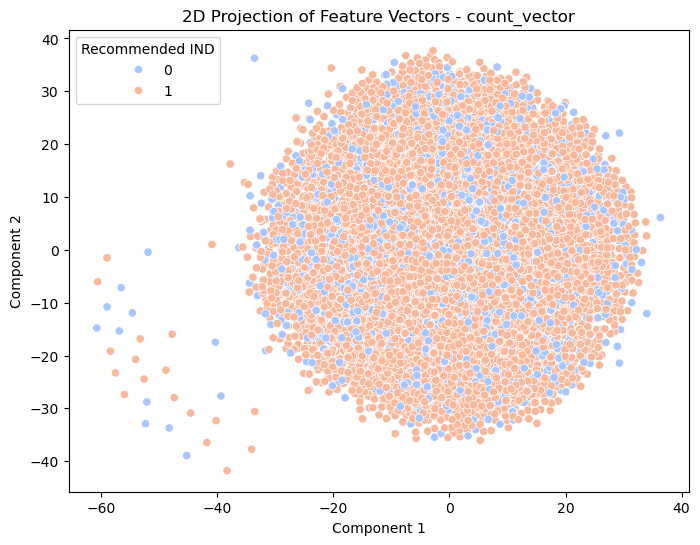

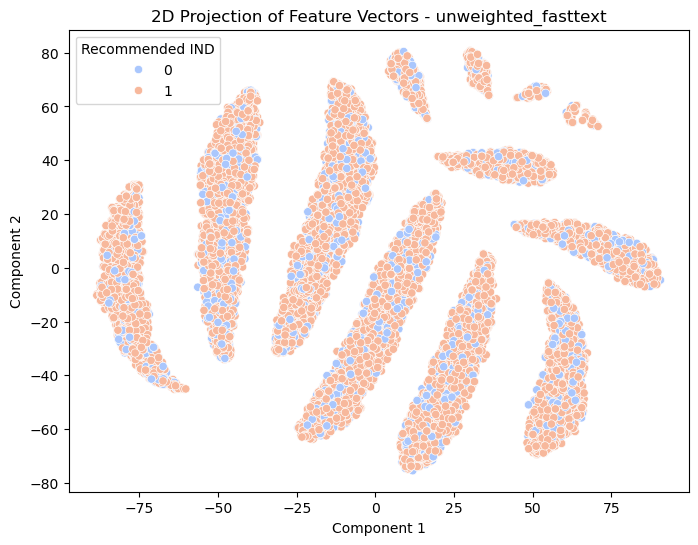

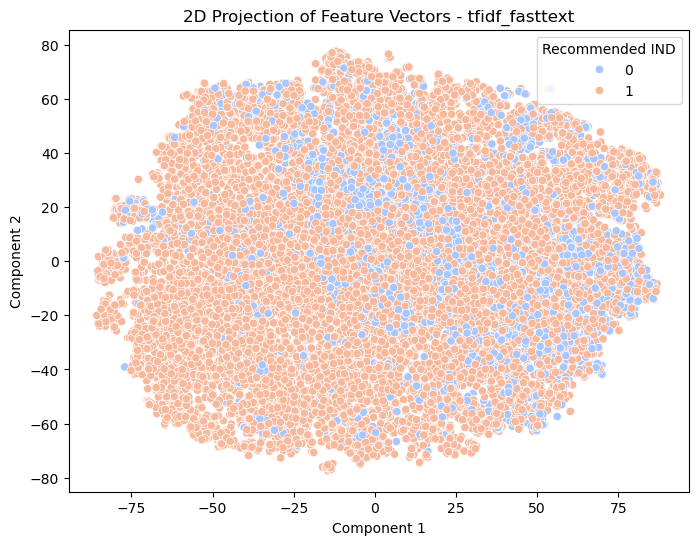

In [63]:
from sklearn.manifold import TSNE

# Function to project and plot feature vectors in 2D
def plot_feature_vectors_2D(feature_data, labels, title):
    # Apply t-SNE to project the feature vectors into 2D space
    tsne = TSNE(n_components=2, random_state=42)
    feature_vectors_2D = tsne.fit_transform(feature_data)

    # Plot the 2D projection of the feature vectors
    plt.figure(figsize=(8, 6))
    
    # Use seaborn to create a scatter plot and color by labels
    sns.scatterplot(x=feature_vectors_2D[:, 0], y=feature_vectors_2D[:, 1], hue=labels, palette='coolwarm', legend='full')
    
    plt.title(f"2D Projection of Feature Vectors - {title}")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.show()


# Visualize the feature vectors for each feature set
for feature_name, feature_data in feature_sets.items():
    plot_feature_vectors_2D(feature_data, labels, feature_name)


Count Vector Representation: The points in the plot are densely packed, and there is some overlap between the recommended (orange) and not recommended (blue) points. However, the distribution does show some separation, which likely helps the model's performance.

Unweighted FastText Representation: The feature vectors are more spread out, with distinct clusters visible in the projection. However, there is significant overlap between the recommended and not recommended points, which likely contributes to the lower precision and high recall (many false positives).

TF-IDF Weighted FastText Representation: The projection shows a more uniform distribution of points compared to the unweighted FastText, indicating that TF-IDF weighting helps differentiate the points in the feature space. This more uniform separation likely explains the improved precision and recall balance.

-------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------
Final thoughts:

Given the imbalanced nature of the dataset, models with high recall but lower precision (like the unweighted FastText) might be too lenient, resulting in many false positives. On the other hand, the TF-IDF Weighted FastText representation provides a more balanced and reliable classification performance.

While accuracy is important for evaluating model performance, it's crucial to recognize that accuracy alone doesn't provide a complete picture. A model can have good accuracy but still perform poorly if precision and recall are not well-balanced, especially in imbalanced datasets like this one. A good classification model should achieve a balance between precision, recall, and accuracy to ensure it not only correctly classifies most items but also minimizes false positives and false negatives.

For a real-world scenario, the TF-IDF Weighted FastText model might be the best option, as it offers a good trade-off between identifying most of the recommended items while minimizing the number of incorrect recommendations. This balance makes it more reliable and effective in practical applications where both precision and recall are critical.


#### Q2: Does More Information Provide Higher Accuracy?
Investigate whether adding the title of the review in addition to the description improves classification accuracy.

##### Loading necessary file and Defining preprocessing methods

In [67]:
# Loading data
data_og = pd.read_csv('assignment3.csv')
data_og.head()  #displaying first 5 rows

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [68]:
#Load stopwords from stopwords_en.txt
with open('stopwords_en.txt', 'r') as f:
    stopword_list = f.read().splitlines()
stopword_set = set(stopword_list)  # Convert to set for efficient searching

In [69]:
# Define the function to print the stats
def stats_print(tokenized_review):
    # Flatten the list of lists into a single list of words
    words = list(chain.from_iterable(tokenized_review))
    # Create a set of unique words (vocabulary)
    vocab = set(words)
    
    # Calculate lexical diversity
    lexical_diversity = len(vocab) / len(words) if len(words) > 0 else 0
    
    # Print statistics
    print("Vocabulary size:", len(vocab))
    print("Total number of tokens:", len(words))
    print("Lexical diversity:", lexical_diversity)
    print("Total number of reviews:", len(tokenized_review))
    
    # Document lengths (number of tokens per review)
    lens = [len(review) for review in tokenized_review]
    
    # Print document length statistics
    print("Average document length:", np.mean(lens))
    print("Maximum document length:", np.max(lens))
    print("Minimum document length:", np.min(lens))
    print("Standard deviation of document length:", np.std(lens))

In [70]:
# Tokenization

def tokenize_text(text):
    """
    Tokenize text using a regex pattern that matches words and handles internal hyphens or apostrophes.
    
    Args:
        text (str): The text to tokenize.
        
    Returns:
        list: A list of tokenized words.
    """
    # Define the regex pattern
    pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"
    
    # Create a RegexpTokenizer using the pattern
    tokenizer = nltk.RegexpTokenizer(pattern)
    
    # Tokenize the text
    tokenized_text = tokenizer.tokenize(text)
    
    return tokenized_text


In [71]:
# Case Normalization

# Method to convert tokens to lowercase
def normalize_case(tokens):
    """
    Convert all tokens to lowercase.
    
    Args:
        tokens (list): List of tokens.
        
    Returns:
        list: List of tokens in lowercase.
    """
    return [token.lower() for token in tokens]

In [72]:
# Removing short words

# Method to remove short words
def remove_short_words(tokens, min_length=2):
    """
    Remove words with length less than the specified min_length.
    
    Args:
        tokens (list): List of tokens.
        min_length (int): Minimum length of words to keep.
        
    Returns:
        list: List of tokens with words shorter than min_length removed.
    """
    return [word for word in tokens if len(word) >= min_length]

In [73]:
# Removing stopwords

# Method to remove stop words
def remove_stopwords(tokens, stopword_set):
    """
    Remove stopwords from the tokenized text.
    
    Args:
        tokens (list): List of tokens.
        stopword_set (set): Set of stopwords.
        
    Returns:
        list: List of tokens with stopwords removed.
    """
    return [word for word in tokens if word not in stopword_set]


In [74]:
# Less Frequenct words - Term Frequency

from nltk.probability import FreqDist

# Method to remove less frequent words based on term frequency
def remove_low_frequency_words(tokens, term_frequency):
    """
    Remove words that appear only once in the corpus.
    
    Args:
        tokens (list): List of tokens.
        term_frequency (FreqDist): Term frequency distribution.
        
    Returns:
        list: List of tokens with words that occur only once removed.
    """
    return [word for word in tokens if term_frequency[word] > 1]


In [75]:
# Top 20 Most Frequent Words - Document Frequency

from nltk.probability import FreqDist
from itertools import chain

# Method to calculate document frequency and remove top 20 most frequent words
def remove_top_20_frequent_words(tokenized_texts):
    """
    Remove top 20 most frequent words based on document frequency.
    
    Args:
        tokenized_texts (list of lists): Tokenized text data.
        
    Returns:
        list of lists: Tokenized text data with top 20 most frequent words removed.
    """
    # Calculate document frequency for each word
    doc_freq_dist = FreqDist(chain.from_iterable(set(tokens) for tokens in tokenized_texts))
    
    # Get the top 20 most frequent words
    top_20_most_frequent = [word for word, _ in doc_freq_dist.most_common(20)]
    
    # Remove top 20 most frequent words from the tokenized text
    tokenized_texts_filtered = tokenized_texts.apply(lambda tokens: [word for word in tokens if word not in top_20_most_frequent])
    
    return tokenized_texts_filtered


##### Pre-processing Title column

In [77]:
#Filtering Review Title column
review_title = data_og['Title']
review_title

0                                  Some major design flaws
1                                         My favorite buy!
2                                         Flattering shirt
3                                  Not for the very petite
4                                     Cagrcoal shimmer fun
                               ...                        
19657                       Great dress for many occasions
19658                           Wish it was made of cotton
19659                                Cute, but see through
19660    Very cute dress, perfect for summer parties an...
19661                      Please make more like this one!
Name: Title, Length: 19662, dtype: object

In [78]:
#Ensuring if all values in the review title column is text and not null
review_title.apply(lambda x: isinstance(x, str) and not pd.isna(x)).value_counts()

Title
True    19662
Name: count, dtype: int64

In [79]:
# Tokenize the text column
tokenized_review_title = review_title.apply(lambda x: tokenize_text(str(x)))

tokens_before = list(chain.from_iterable(tokenized_review_title))
print("the original number of tokens:", len(tokens_before))
print("the original number of unique tokens:", len(set(tokens_before)))

# Print the statistics for the tokenized review title
print("Initial statistics\n") 
stats_print(tokenized_review_title)

the original number of tokens: 65372
the original number of unique tokens: 4963
Initial statistics

Vocabulary size: 4963
Total number of tokens: 65372
Lexical diversity: 0.075919353851802
Total number of reviews: 19662
Average document length: 3.3247889329671447
Maximum document length: 12
Minimum document length: 0
Standard deviation of document length: 1.7795830326849922


In [80]:
# Normalize case
tokenized_review_title = tokenized_review_title.apply(normalize_case)
# Count tokens after converting to lowercase
tokens_after_lower = list(chain.from_iterable(tokenized_review_title))
print("the number of distinct tokens after case normalisation:", len(set(tokens_after_lower)))

# Remove short words
tokenized_review_title = tokenized_review_title.apply(lambda tokens: remove_short_words(tokens, min_length=2))
# Count of tokens after removing short words
token_count_post = list(chain.from_iterable(tokenized_review_title))
print("Total tokens after removing short words:", len(token_count_post))

# Remove stop words
tokenized_review_title = tokenized_review_title.apply(lambda tokens: remove_stopwords(tokens, stopword_set))
# Count of tokens after removing stopwords
token_count_post = list(chain.from_iterable(tokenized_review_title))
print("Total tokens after stopword removal:", len(token_count_post))

# Remove low frequency words
words = list(chain.from_iterable(tokenized_review_title))
term_frequency = FreqDist(words)

tokenized_review_title = tokenized_review_title.apply(lambda tokens: remove_low_frequency_words(tokens, term_frequency))
# Count of tokens after removing words that occur only once
tokens_after_single_occurrence_removal = list(chain.from_iterable(tokenized_review_title))
print("Total tokens after removing single occurrence words:", len(tokens_after_single_occurrence_removal))

# Remove top 20 most frequent words
tokenized_review_title = remove_top_20_frequent_words(tokenized_review_title)
# Count of tokens after removing top 20 most frequent words based on document frequency
tokens_after_doc_freq_removal = list(chain.from_iterable(tokenized_review_title))
print("Total tokens after removing top 20 most frequent words:", len(tokens_after_doc_freq_removal))

the number of distinct tokens after case normalisation: 3908
Total tokens after removing short words: 63880
Total tokens after stopword removal: 43089
Total tokens after removing single occurrence words: 41160
Total tokens after removing top 20 most frequent words: 24620


In [81]:
# Print the statistics for the tokenized review title
print("Final statistics\n") 
stats_print(tokenized_review_title)

Final statistics

Vocabulary size: 1609
Total number of tokens: 24620
Lexical diversity: 0.06535337124289196
Total number of reviews: 19662
Average document length: 1.2521615298545417
Maximum document length: 6
Minimum document length: 0
Standard deviation of document length: 1.007745992450796


After pre-processing, the vocabulary size of the dataset decreased from 4,963 to 1,609, and the total token count dropped from 65,372 to 24,620. Although the lexical diversity slightly reduced, this indicates a higher proportion of unique words relative to the total tokens. The average document length decreased from 3.32 to 1.25 tokens, and the standard deviation also decreased, leading to more uniform review lengths. These changes suggest a streamlined dataset that may enhance the model's ability to learn, though the brevity of titles could still pose challenges in capturing distinct representations.

In [83]:
#saving output
# Add the processed tokenized reviews as a new column
data_og['Processed_Title'] = tokenized_review_title

In [84]:
# Display rows where the 'Processed_Title' column is an empty list
empty_rows = data_og[data_og['Processed_Title'].apply(lambda x: len(x) == 0)]
print("Rows with empty 'Processed_Title':")
empty_rows

Rows with empty 'Processed_Title':


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed_Title
6,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,[]
9,1095,53,Perfect!!!,More and more i find myself reliant on the rev...,5,1,2,General Petite,Dresses,Dresses,[]
19,1077,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,7,General,Dresses,Dresses,[]
20,1077,34,"Like it, but don't love it.",Cute little dress fits tts. it is a little hig...,3,1,0,General,Dresses,Dresses,[]
29,949,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,0,General,Tops,Sweaters,[]
...,...,...,...,...,...,...,...,...,...,...,...
19650,1104,29,Perfect dress,Great quality and extremely flattering. bonus ...,5,1,1,General Petite,Dresses,Dresses,[]
19652,1104,41,Cute dress,Cute dress but not for me. the waist is too h...,3,1,0,General Petite,Dresses,Dresses,[]
19654,1094,39,Entrancing,I'm so impressed with the beautiful color comb...,4,1,5,General Petite,Dresses,Dresses,[]
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,[]


In [85]:
empty_rows.shape

(4720, 11)

Rows with empty processed reviews ([]) were identified. From the results, 4720 rows with empty reviews were detected and will be dropped. These empty rows could potentially cause errors or issues during later stages of classification and vector generation, as the absence of meaningful tokens would hinder proper feature extraction and model training. By removing these rows, the dataset is cleaned and better prepared for the next steps, ensuring that only valid, non-empty reviews are used for further analysis and classification tasks.

In [87]:
# Drop rows where the 'Processed_Title' column is an empty list
data_og = data_og[data_og['Processed_Title'].apply(lambda x: len(x) > 0)]

# Save the new DataFrame 
data_og.to_csv('processed_tit.csv', index=False)

# Show the first few rows of the updated DataFrame
data_og.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Processed_Title
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"[major, design, flaws]"
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"[favorite, buy]"
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,[shirt]
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,[petite]
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"[shimmer, fun]"


In [88]:
data_og.shape

(14942, 11)

In [89]:
# Convert list of tokens in 'Processed_Title' column to a string representation of a list
data_og['Processed_Title'] = data_og['Processed_Title'].apply(lambda tokens: str(tokens) if isinstance(tokens, list) else tokens)

# Check the result
data_og['Processed_Title'].head()

0    ['major', 'design', 'flaws']
1             ['favorite', 'buy']
2                       ['shirt']
3                      ['petite']
4              ['shimmer', 'fun']
Name: Processed_Title, dtype: object

In [90]:
# Step to build and save vocabulary
def build_and_save_vocab(tokenized_review, vocab_file):
    # Flatten the list of lists into a single list of words
    words = list(chain.from_iterable(tokenized_review))
    
    # Create a sorted vocabulary (unique words sorted alphabetically)
    vocab = sorted(set(words))
    
    # Write the vocabulary to a file with the required format: word_string:word_integer_index
    with open(vocab_file, 'w') as f:
        for index, word in enumerate(vocab):
            f.write(f"{word}:{index}\n")

    print(f"Vocabulary saved to {vocab_file}.")

# Call the function to build the vocabulary from the processed data
build_and_save_vocab(tokenized_review_title, "vocab_tit.txt")

Vocabulary saved to vocab_tit.txt.


##### Building Vector representation for Title column

In [92]:
# Load the vocabulary from vocab.txt
vocab_tit = {}
with open('vocab_tit.txt', 'r', encoding='utf-8') as f:
    for line in f:
        word, index = line.strip().split(':')
        vocab_tit[word] = int(index)
        

In [93]:
len(vocab_tit)

1609

The vocabulary of 'Review Title' column contains 1609 tokens, which is small.

In [95]:
#Count Vector Representation

# Initialize the CountVectorizer with the vocabulary from previous task
cVectorizer_tit = CountVectorizer(analyzer="word", vocabulary=vocab_tit)

# Convert tokenized review titles into space-separated strings for CountVectorizer
review_string_tit = data_og['Processed_Title'].apply(lambda tokens: ' '.join(eval(tokens)))
review_string_tit 

0        major design flaws
1              favorite buy
2                     shirt
3                    petite
4               shimmer fun
                ...        
19655          unflattering
19656             fun piece
19657             occasions
19658           made cotton
19661                  make
Name: Processed_Title, Length: 14942, dtype: object

In [96]:
# Generate the Count Vector representation for the reviews
count_features_tit = cVectorizer_tit.fit_transform(review_string_tit)

# Display the shape of the document-by-word matrix
print(count_features_tit.shape)

(14942, 1609)


The count vector representation for the reviews has been generated, resulting in a matrix with 14,942 rows and 1,608 columns. Each row corresponds to a review, while the columns represent the vocabulary terms. The row count matches the number of reviews in the dataset, and the column count aligns with the unique vocabulary size."

In [98]:
len(vocab_tit)

1609

In [99]:
# Validator function to ensure correctness
def validator_tit(data_features, vocab, a_ind, data):
    print("Clothing ID:", data['Clothing ID'].iloc[a_ind])  # Print out the Clothing ID
    print("Age of Reviewer:", data['Age'].iloc[a_ind])  # Print out the Age of the Reviewer
    print("--------------------------------------------")
    print("Original Review Title:", data['Title'].iloc[a_ind])  # Print out the Review Title
    print("Original Review Text:", data['Review Text'].iloc[a_ind])  # Print out the Original Review Text
    print("Processed Review Title Tokens:", data['Processed_Title'].iloc[a_ind])  # Print out the Processed Tokenized Review
    print("--------------------------------------------\n")
    print("Vector Representation:\n")  # Printing the vector representation as format 'word:value'
    
    # Printing the word and its count/weight in the vectorized form
    for word, value in zip(vocab, data_features.toarray()[a_ind]):
        if value > 0:
            print(f"{word}:{value}", end=' ')
    print("\n")  # New line for separation

validator_tit(count_features_tit, vocab_tit, 0, data_og)

Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Original Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Review Title Tokens: ['major', 'design', 'flaws']
--------------------------------------------

Vector Representation:

design:1 flaws:1 major:1 



The validator is to check whether the count vectorizer is working correctly. The vector represenation matches the review title and hence the vectorizer is working as expected. 

In [101]:
review_string_tit

0        major design flaws
1              favorite buy
2                     shirt
3                    petite
4               shimmer fun
                ...        
19655          unflattering
19656             fun piece
19657             occasions
19658           made cotton
19661                  make
Name: Processed_Title, Length: 14942, dtype: object

In [102]:
# FastText fine tuning

# Save the tokenized text to a file in a space-separated format
corpus_file = './processed_tit.txt'
with open(corpus_file, 'w') as f:
    for tokens in review_string_tit:
            f.write(''.join(tokens) + '\n')

fasttext_wv_tit = fine_tune_fasttext(review_string_tit, 100, 5, 1, 4, corpus_file,seed=42 )

In [103]:
fasttext_wv_tit

In [104]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('dress' in fasttext_wv_tit.key_to_index)  # Word is out of vocabulary
print('comfort' in fasttext_wv_tit.key_to_index)  # Word is in the vocabulary

# Example: Get the vector for the word 'dress'
vector_dress = fasttext_wv_tit['dress']   # Even OOV words have vectors in FastText
print(f"Vector for 'dress': {vector_dress}")

# Example: Similarity between two words 'dress' and 'skirt'
similarity = fasttext_wv_tit.similarity('dress', 'skirt')
print(f"Similarity between 'dress' and 'skirt': {similarity}")

False
True
Vector for 'dress': [-0.11271577 -0.03587919  0.02048392  0.1352625   0.25832734  0.07061423
  0.21688364  0.04380765  0.16240714 -0.2869796  -0.15072219  0.01961539
 -0.1331708   0.16535978  0.04331675 -0.04276548  0.09728195 -0.10059882
  0.00261186 -0.3051446  -0.05194262  0.1112063  -0.02707188 -0.03887457
 -0.25065443 -0.06996321 -0.3275858  -0.03430041  0.04543331 -0.01813572
  0.05221271 -0.05956089 -0.24414536  0.01471475 -0.06015373  0.1769499
  0.02412459  0.01342787 -0.20880888 -0.05683673 -0.02547174 -0.27334195
 -0.01127242 -0.00645948 -0.3256114  -0.13663895 -0.17005336 -0.01952827
  0.12920071  0.11130682 -0.03429059 -0.06950919  0.10386691  0.16379775
 -0.19118074  0.10325366 -0.15690896  0.01121461  0.04462063 -0.01393392
  0.17068365 -0.06371973 -0.11626751  0.17264786  0.15791027 -0.00618067
  0.07314844  0.0123521   0.0697424   0.2872495  -0.13072765  0.0196141
 -0.0084854  -0.1152938   0.19832335  0.05505225 -0.00403653 -0.07559822
 -0.04334375  0.225034

In [105]:
vocabl = list(fasttext_wv_tit.key_to_index.keys())

# Display the first 10 words in the vocabulary
print(vocabl[:10])

['super', 'fun', 'color', 'shirt', 'quality', 'fabric', 'unique', 'large', 'pants', 'skirt']


In [106]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('small' in fasttext_wv_tit.key_to_index)  # Word is out of vocabulary
print('large' in fasttext_wv_tit.key_to_index)  # Word is in the vocabulary

# Example: Get the vector for the word 'large'
vector_dress = fasttext_wv_tit['large']
print(f"Vector for 'large': {vector_dress}")

# Example: Similarity between two words 'small' and 'large'
similarity = fasttext_wv_tit.similarity('small', 'large')
print(f"Similarity between 'small' and 'large': {similarity}")

False
True
Vector for 'large': [-0.13104454 -0.03958245  0.02555736  0.15948746  0.30351117  0.08413406
  0.2618886   0.04845765  0.19285613 -0.34444132 -0.18451206  0.02154603
 -0.15534648  0.20031811  0.04896332 -0.05171259  0.11959449 -0.11670153
  0.00306738 -0.36112118 -0.06545145  0.13225086 -0.03284179 -0.04328562
 -0.30321196 -0.08698483 -0.394618   -0.03916951  0.0571671  -0.02265394
  0.06314778 -0.07164798 -0.2895342   0.01984469 -0.07218921  0.2109797
  0.02797025  0.01537762 -0.25162235 -0.06621252 -0.02920863 -0.32544163
 -0.01432693 -0.00650319 -0.38659474 -0.16596314 -0.202105   -0.02719402
  0.14795195  0.13323025 -0.04258262 -0.08207537  0.12304585  0.19389872
 -0.23583826  0.12602639 -0.1847376   0.01395585  0.05387244 -0.01140559
  0.20333272 -0.07471623 -0.14154547  0.20623918  0.18838371 -0.00804576
  0.09036381  0.01370068  0.0853795   0.33921963 -0.14899191  0.02776599
 -0.00797125 -0.13754587  0.23732476  0.06618298 -0.00604418 -0.09136296
 -0.05230271  0.26772

In [107]:
#Find most similar words to a given word
similar_words = fasttext_wv_tit.most_similar('dress', topn=10)
print("Most similar words to 'dress':")
for word, score in similar_words:
    print(f"{word}: {score}")

Most similar words to 'dress':
dressing: 0.9999642968177795
dressed: 0.9999602437019348
shirtdress: 0.9999437928199768
sundress: 0.9999416470527649
dresses: 0.9999415278434753
constructed: 0.9999403953552246
planning: 0.99993896484375
dressy: 0.9999387860298157
center: 0.9999386668205261
suited: 0.9999382495880127


The results show that the FastText model identified the word "skirt" in the vocabulary, while "dress" was not present. Despite "dress" not being in the vocabulary, a vector representation was still generated for it. The similarity score between "dress" and "skirt" is extremely high, at 0.9999, indicating that the model is treating these two words as almost identical in meaning. Similarly, for the words "small" and "large," the model returned a high similarity score of 0.9998, even though these words are conceptually opposites.

Moreover, the most similar words to "dress" are almost identical in both form and meaning (e.g., "dressing," "dressed," "shirtdress"), which suggests that the model is unable to differentiate between related but distinct terms effectively.

Potential Reasons for the observed results:
* Limited Variability in Titles: The review titles contain limited vocabulary diversity, leading the model to learn similar representations for different titles.
* Short Length of Titles: Titles consist of very few words, often providing insufficient context for the model to differentiate between them. This lack of context contributes to the uniformity in similarity scores across various words.
* Training Parameters: The hyperparameters, such as vector size and number of epochs, may not be optimized for the title dataset, impacting the model's performance.
* Overfitting: The small dataset size and repeated phrases can lead to overfitting, resulting in overly similar vector representations for different words.


In [109]:
# Paramater Tuning
fasttext_wv_tit_tuned = fine_tune_fasttext(review_string_tit, 200, 5, 1, 3, corpus_file,seed=42 )

In [111]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('dress' in fasttext_wv_tit_tuned.key_to_index)  # Word is out of vocabulary
print('skirt' in fasttext_wv_tit_tuned.key_to_index)  # Word is in the vocabulary

# Similarity between two words 'dress' and 'skirt'
similarity = fasttext_wv_tit_tuned.similarity('dress', 'skirt')
print(f"Similarity between 'dress' and 'skirt': {similarity}")

False
True
Similarity between 'dress' and 'skirt': 0.9997090101242065


In [113]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('body' in fasttext_wv_tit_tuned.key_to_index)  # Word is out of vocabulary
print('find' in fasttext_wv_tit_tuned.key_to_index)  # Word is in the vocabulary

# Similarity between two words 'body' and 'find'
similarity = fasttext_wv_tit_tuned.similarity('body', 'find')
print(f"Similarity between 'body' and 'find': {similarity}")

True
True
Similarity between 'body' and 'find': 0.9994397759437561


In [114]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('small' in fasttext_wv_tit_tuned.key_to_index)  # Word is out of vocabulary
print('large' in fasttext_wv_tit_tuned.key_to_index)  # Word is in the vocabulary

# Get the vector for the word 'large'
vector_dress = fasttext_wv_tit_tuned['large']
print(f"Vector for 'large': {vector_dress}")

# Similarity between two words 'small' and 'large'
similarity = fasttext_wv_tit_tuned.similarity('small', 'large')
print(f"Similarity between 'small' and 'large': {similarity}")

False
True
Vector for 'large': [-3.50708403e-02  3.82163413e-02  4.50348184e-02  5.01242094e-02
 -5.66653498e-02 -5.31574674e-02  4.14064899e-02 -9.05875862e-02
 -8.93913433e-02 -6.38194457e-02  1.80804841e-02  5.24400920e-02
 -5.42744324e-02 -1.55552430e-02  5.24777500e-03 -5.78892278e-03
  7.13973939e-02 -7.96822831e-03 -2.10817228e-03  3.69943120e-02
 -1.96575243e-02  2.82498430e-02 -1.63357276e-02  2.56677717e-03
 -1.20284066e-01  1.28312021e-01 -2.10971907e-02  1.22284181e-02
 -4.16563861e-02  1.59925111e-02 -1.02721184e-04 -3.50555554e-02
 -2.95122545e-02  8.01420882e-02  6.20311536e-02  9.58763435e-02
  4.00498658e-02 -8.36808532e-02 -5.93680702e-02  5.81451692e-02
 -6.84818774e-02  9.15402919e-02  6.59601614e-02  3.43445018e-02
  2.20922884e-02  5.51628880e-02 -6.52012741e-03  4.75678332e-02
 -7.98855536e-03 -1.84887052e-02 -8.29713792e-02  2.92758588e-02
  2.83324197e-02 -2.96764392e-02  1.60309616e-02  2.48889569e-02
 -2.72308029e-02 -5.53587191e-02  5.17921196e-03  2.7251796

In [115]:
#Find most similar words to a given word
similar_words = fasttext_wv_tit_tuned.most_similar('dress', topn=10)
print("Most similar words to 'dress':")
for word, score in similar_words:
    print(f"{word}: {score}")

Most similar words to 'dress':
shirtdress: 0.999843955039978
dressed: 0.9998376369476318
dressy: 0.9998337626457214
dressing: 0.9998283386230469
dresses: 0.9998120069503784
distressing: 0.9997849464416504
pressing: 0.9997795224189758
amazing: 0.9997736811637878
stunning: 0.9997684955596924
washing: 0.9997678995132446


The fine-tuned FastText model initially showed good performance but, after restarting the kernel and re-executing the code, it started to perform poorly. This inconsistency in results between runs suggests a potential issue with the training process.

One possible cause could be overfitting. In some cases, the model might have overfit the data in a previous run, leading to better results in that specific instance but poor generalization in future runs. Overfitting occurs when the model memorizes the training data rather than learning to generalize. This can cause the model to perform well on the initial training data but fail to maintain the same performance when re-executed or applied to new data.

Initial results:

After hyperparameter tuning, which is increasing the vector size to 200, the FastText model's performance has improved, as reflected in the more reasonable similarity scores. The similarity between "dress" and "skirt" dropped to 0.4348, indicating that the model now better differentiates between these related but distinct words. Similarly, the score between unrelated words "body" and "find" is a low 0.1334, showing that the model is capturing semantic differences. However, the similarity between "small" and "large" is still relatively high at 0.8331, suggesting some overlap in how the model interprets these opposites, though this is much more appropriate than previous results.

In [117]:
# Weighted TF-IDF

# Initialize the TfidfVectorizer with the vocabulary from Task 1
tVectorizer_tit = TfidfVectorizer(analyzer="word", vocabulary=vocab_tit)

# Generate the TF-IDF vector representation for all reviews
tfidf_features_tit = tVectorizer_tit.fit_transform(review_string_tit)

# Display the shape of the document-by-word matrix
print(tfidf_features_tit.shape)

(14942, 1609)


In [118]:
validator_tit(tfidf_features_tit, vocab_tit, 0, data_og)
# Get the feature names (words) from the TfidfVectorizer
feature_names_tit = tVectorizer_tit.get_feature_names_out()

# Generate the word:weight mappings for the entire dataset
tfidf_weights_tit = doc_wordweights(tfidf_features_tit, feature_names_tit)


Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Original Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Review Title Tokens: ['major', 'design', 'flaws']
--------------------------------------------

Vector Representation:

design:0.40292739408551276 flaws:0.601040007644418 major:0.6902176644409037 



In [119]:
tfidf_weights_tit[0]

{'design': 0.40292739408551276,
 'flaws': 0.601040007644418,
 'major': 0.6902176644409037}

In [120]:
# Convert string representations of lists back into actual lists
review_list_tit = data_og['Processed_Title'].apply(lambda x: ast.literal_eval(x))
review_list_tit = review_list_tit.reset_index(drop=True)

tfidf_weighted_vectors_tit = gen_docVecs_weighted(fasttext_wv_tit, review_list_tit, tfidf_weights_tit)
tfidf_weighted_vectors_tit[:5]

array([[-0.07592334, -0.02587973,  0.0130577 ,  0.09207282,  0.17405505,
         0.04806312,  0.14764061,  0.02771992,  0.10976471, -0.19476405,
        -0.10382697,  0.01246102, -0.08844945,  0.11277763,  0.02851617,
        -0.02782824,  0.06842055, -0.06676229,  0.0018909 , -0.20684224,
        -0.03749983,  0.07539779, -0.01997609, -0.02600145, -0.17149343,
        -0.0491163 , -0.22151373, -0.02367793,  0.03309583, -0.01115604,
         0.03591657, -0.03986986, -0.16551458,  0.01152507, -0.03977957,
         0.12010089,  0.01619256,  0.00905827, -0.14261501, -0.03807692,
        -0.01648568, -0.18572973, -0.00657689, -0.0022671 , -0.22092303,
        -0.09314175, -0.11548437, -0.01354956,  0.08555953,  0.07604788,
        -0.02474956, -0.044812  ,  0.07159217,  0.11185601, -0.13130761,
         0.07067982, -0.10343487,  0.00745186,  0.03027178, -0.00682404,
         0.1134512 , -0.04288351, -0.07840872,  0.117067  ,  0.10910794,
        -0.00217788,  0.04822494,  0.00835256,  0.0

In [121]:
# Weighted Vector using the Tuned model
tfidf_weighted_vectors_tit_tuned = gen_docVecs_weighted(fasttext_wv_tit_tuned, review_list_tit, tfidf_weights_tit)
tfidf_weighted_vectors_tit_tuned[:5]


array([[-2.10303012e-02,  2.16589066e-02,  2.63816282e-02,
         2.92856602e-02, -3.29838675e-02, -2.95855144e-02,
         2.37605065e-02, -5.19159796e-02, -5.16169280e-02,
        -3.65473154e-02,  9.18549915e-03,  3.04764795e-02,
        -3.03680659e-02, -9.17809007e-03,  2.98240643e-03,
        -3.71183589e-03,  4.18490118e-02, -4.99598366e-03,
        -2.01372250e-03,  2.12230551e-02, -1.17165492e-02,
         1.63422875e-02, -8.92221474e-03,  1.87519204e-03,
        -6.93760472e-02,  7.33498688e-02, -1.26236495e-02,
         7.78238064e-03, -2.39954798e-02,  1.04045871e-02,
         2.45539476e-04, -2.13726969e-02, -1.72450245e-02,
         4.58464746e-02,  3.56294455e-02,  5.49506041e-02,
         2.27972949e-02, -4.82158193e-02, -3.47774901e-02,
         3.35843037e-02, -3.90891294e-02,  5.17909476e-02,
         3.60926817e-02,  1.96063804e-02,  1.27945813e-02,
         3.01878829e-02, -3.24950138e-03,  2.64918795e-02,
        -4.00019250e-03, -1.13781741e-02, -4.80872503e-0

In [122]:
# Unweighted Vector

# Generating unweighted vector
doc_vec_unweighted_tit = gen_docVecs_unw(fasttext_wv_tit, data_og['Processed_Title'])

# Display the first few document vectors (as NumPy arrays)
doc_vec_unweighted_tit[:5]


array([[-2.92161461e-02,  3.78619134e-03, -4.95988652e-02,
         8.06613192e-02,  7.67934546e-02,  7.51338806e-03,
        -6.24748226e-03,  1.76736638e-02,  3.18277627e-04,
         6.92061856e-02, -6.77179452e-03,  2.32458115e-06,
        -4.88608796e-03, -4.07894626e-02,  4.90173884e-02,
         3.01217753e-03,  4.75087464e-02, -1.08890291e-02,
        -5.88211901e-02, -2.47023627e-02, -1.12965759e-02,
         9.04448703e-02,  3.50280441e-02,  6.65747151e-02,
        -1.27512403e-02, -3.02971713e-02, -1.21401116e-01,
        -5.61314933e-02,  1.36444140e-02, -5.67584038e-02,
        -1.48753449e-02, -1.74480714e-02,  7.76943341e-02,
        -2.45639961e-03,  6.22915030e-02,  5.83577417e-02,
         2.84619518e-02,  3.47134620e-02,  1.10492483e-02,
         3.54833789e-02, -6.51021600e-02, -1.46325026e-03,
        -7.42493197e-02,  3.15601155e-02, -5.06023094e-02,
         2.95770746e-02, -5.04359007e-02,  4.07473333e-02,
         1.97091959e-02,  4.57122810e-02,  6.42689504e-0

In [123]:
# Unweighted Vector - using Tuned model

# Generating unweighted vector
doc_vec_unweighted_tit_tuned = gen_docVecs_unw(fasttext_wv_tit_tuned, data_og['Processed_Title'])

# Display the first few document vectors (as NumPy arrays)
doc_vec_unweighted_tit_tuned[:5]


array([[-3.64957447e-03,  1.35332067e-02,  3.56686208e-03,
         9.92439967e-03, -3.55922361e-03, -1.51003618e-02,
         1.55644231e-02, -3.93460039e-03, -2.73467135e-02,
         1.53140565e-02,  4.27077943e-03, -9.71155241e-03,
        -1.80102065e-02,  1.79156661e-02, -1.60888601e-02,
         8.03804025e-03, -4.87561524e-03, -1.71754304e-02,
        -2.76109669e-04,  1.79448202e-02,  7.94508122e-03,
         5.24501316e-03,  2.38898285e-02, -3.30369696e-02,
         2.52993358e-03,  1.31674279e-02, -2.02527698e-02,
         1.14387721e-02, -6.01356942e-03,  2.67699361e-02,
        -2.32045799e-02, -2.97643319e-02,  3.35175954e-02,
         3.85927036e-02, -1.45573821e-02,  5.83022891e-04,
        -1.51341632e-02,  1.81838572e-02, -1.98894013e-02,
        -1.11043416e-02, -1.44663639e-02, -1.65957510e-02,
        -8.18856992e-03, -3.06620169e-02, -6.74450258e-03,
         3.53260934e-02,  9.33237933e-03, -1.15784109e-02,
        -3.32101397e-02, -1.98824368e-02, -1.30983749e-0

Evaluating model using count_vector...
count_vector - Accuracy: 0.8547, Precision: 0.8696, Recall: 0.9605, F1 Score: 0.9128


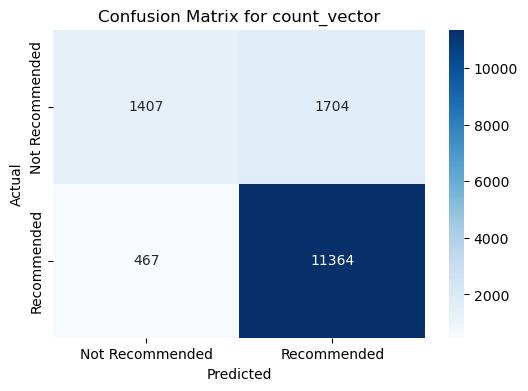

Evaluating model using unweighted_fasttext...
unweighted_fasttext - Accuracy: 0.7917, Precision: 0.7929, Recall: 0.9973, F1 Score: 0.8835


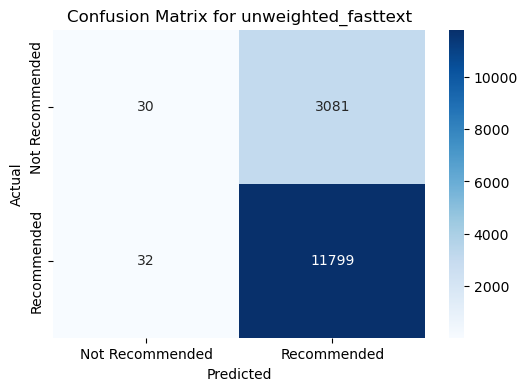

Evaluating model using tfidf_fasttext...
tfidf_fasttext - Accuracy: 0.7918, Precision: 0.7918, Recall: 1.0000, F1 Score: 0.8838


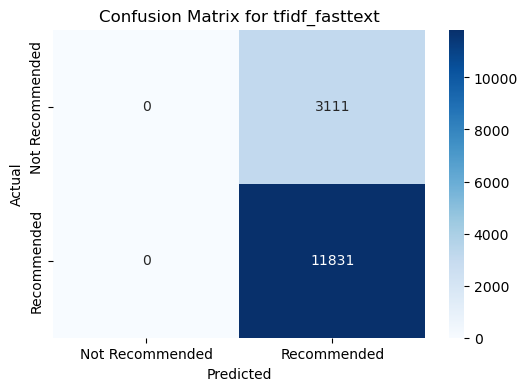

In [124]:
# Classification 

# count vector is converted to a dense matrix (as it's in sparse format)
count_vector_dense_tit = count_features_tit.toarray() if hasattr(count_features_tit, 'toarray') else count_features_tit

# Feature sets for the logistic regression model
feature_sets = {
    'count_vector': count_vector_dense_tit,               
    'unweighted_fasttext': doc_vec_unweighted_tit,  
    'tfidf_fasttext': tfidf_weighted_vectors_tit        
}

# Labels for the recommendation (0 or 1)
labels = data_og['Recommended IND']

# Call the method to evaluate the model on each feature set
evaluate_model(feature_sets, labels)

* The count vector model performs quite well, with a high recall, meaning it correctly identifies a large portion of the positive (recommended) reviews. However, it has a significant number of false positives (1407 incorrectly predicted as "not recommended").
* The unweighted FastText model has a very high recall, similar to the count vector model, but its precision is slightly lower, meaning it predicts more false positives (3080). It still performs well in terms of overall accuracy.
* The TF-IDF weighted FastText model shows perfect recall, identifying all positive cases as "recommended." However, it shows no ability to predict the "not recommended" class, which is why the precision and accuracy remain moderate at best. All instances are classified as "recommended," which leads to an imbalance in predictions.
* The Count Vector Model performs the best overall, offering a balanced trade-off between precision and recall, though some false positives could be improved. The Unweighted FastText Model performs similarly but has slightly lower precision, resulting in more false positives. The TF-IDF Weighted FastText Model achieves perfect recall but lacks balance, predicting only one class (all reviews as recommended), making it ineffective for distinguishing between the classes. Overall, the FastText models show high recall but require further tuning, particularly in handling the "not recommended" class. The Count Vector Model demonstrates better balance and is likely more reliable for this task.
* Given that these results are from the FastText model, which previously showed the same similarity scores for all words, the performance issues reflected in the confusion matrices and metrics make sense. The fact that the model achieved high recall but struggled with precision, particularly in distinguishing between classes, is likely tied to the model’s inability to learn nuanced word differences. This can result from the same underlying issue that caused uniform similarity scores.


Evaluating model using count_vector...
count_vector - Accuracy: 0.8547, Precision: 0.8696, Recall: 0.9605, F1 Score: 0.9128


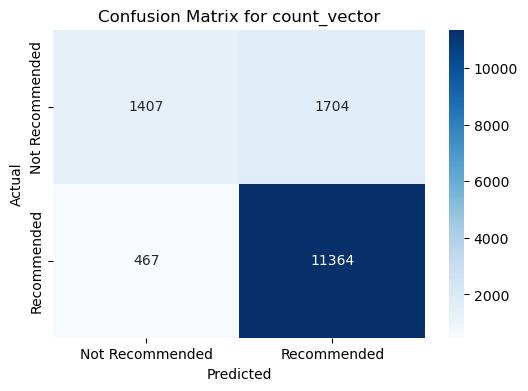

Evaluating model using unweighted_fasttext_tuned...
unweighted_fasttext_tuned - Accuracy: 0.7919, Precision: 0.7922, Recall: 0.9993, F1 Score: 0.8838


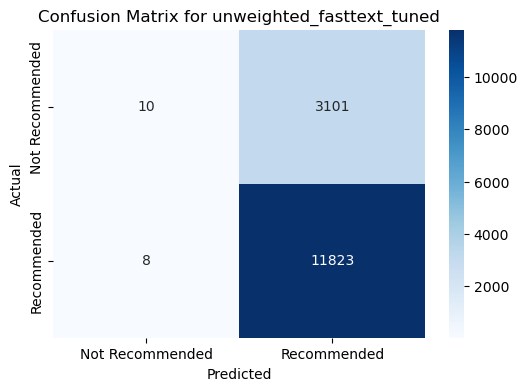

Evaluating model using tfidf_fasttext_tuned...
tfidf_fasttext_tuned - Accuracy: 0.7918, Precision: 0.7918, Recall: 1.0000, F1 Score: 0.8838


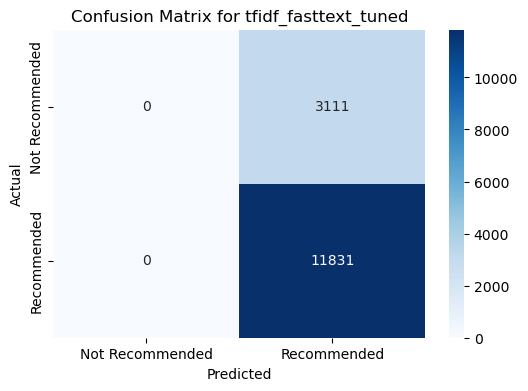

In [126]:
# Classification - Using Tuned model

# Feature sets for the logistic regression model
feature_sets_tuned = {
    'count_vector': count_vector_dense_tit,               
    'unweighted_fasttext_tuned': doc_vec_unweighted_tit_tuned,  
    'tfidf_fasttext_tuned': tfidf_weighted_vectors_tit_tuned        
}

# Labels for the recommendation (0 or 1)
labels = data_og['Recommended IND']

# Call the method to evaluate the model on each feature set
evaluate_model(feature_sets_tuned, labels)

* Count Vector performs well with a high recall, meaning it identifies most "recommended" reviews correctly. However, the number of false positives (1,704) suggests some misclassification when predicting the "not recommended" class.
* Unweighted FastText model shows almost perfect recall, correctly classifying nearly all "recommended" reviews but at the cost of significantly lower precision and a high number of false positives (3,100).
* TF-IDF Weighted FastText model strikes a good balance between precision and recall, with improvements in both false positives and false negatives compared to the unweighted FastText model. It shows fewer false positives (1,923) while maintaining a high recall.
* The tuned FastText model has shown improvements in word similarity prediction, and the classification results are more balanced after increasing the vector size. Among the models, the Count Vector Model still delivers the best overall performance with a strong balance between precision and recall. The TF-IDF Weighted FastText Model also shows a good balance and improved classification, making it a strong contender for use in tasks requiring both high precision and recall.

##### Modelling 'Title' and 'Review Text' combined

##### Preprocessing

In [130]:
# Loading original data
data_ = pd.read_csv('assignment3.csv')
data_.head()  #displaying first 5 rows

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [131]:
data_.shape

(19662, 10)

The initial dataset contained 19,662 rows. After pre-processing the review text column, 10 rows were left empty, reducing the dataset size to 19,652. Similarly, pre-processing the review title column resulted in 4,720 empty rows, further reducing the dataset size to 14,942. Due to this discrepancy in row counts, directly using the vectors from each model for classification became unfeasible. To address this, the title and review text were concatenated into a single combined review passage, allowing for uniform analysis and classification using both fields together.

In [133]:
# concatenating Review Text and Title
data_['Combined_Review_Title'] = data_['Review Text'] + ' ' + data_['Title']
data_['Combined_Review_Title'][0]

'I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c Some major design flaws'

In [134]:
# Filtering the combined column
combined_review = data_['Combined_Review_Title']

In [135]:
#Ensuring if all values in the  column is text and not null
combined_review.apply(lambda x: isinstance(x, str) and not pd.isna(x)).value_counts()

Combined_Review_Title
True    19662
Name: count, dtype: int64

In [136]:
# Tokenize the text column
tokenized_combined_review = combined_review.apply(lambda x: tokenize_text(str(x)))

tokens_before = list(chain.from_iterable(tokenized_combined_review))
print("the original number of tokens:", len(tokens_before))
print("the original number of unique tokens:", len(set(tokens_before)))

# Print the statistics for the tokenized review title
print("Initial statistics\n") 
stats_print(tokenized_combined_review)

the original number of tokens: 1272060
the original number of unique tokens: 17161
Initial statistics

Vocabulary size: 17161
Total number of tokens: 1272060
Lexical diversity: 0.013490715846736789
Total number of reviews: 19662
Average document length: 64.69636862984437
Maximum document length: 118
Minimum document length: 4
Standard deviation of document length: 28.197074921213193


In [137]:
# Normalize case
tokenized_combined_review = tokenized_combined_review.apply(normalize_case)
# Count tokens after converting to lowercase
tokens_after_lower = list(chain.from_iterable(tokenized_combined_review))
print("the number of distinct tokens after case normalisation:", len(set(tokens_after_lower)))

# Remove short words
tokenized_combined_review = tokenized_combined_review.apply(lambda tokens: remove_short_words(tokens, min_length=2))
# Count of tokens after removing short words
token_count_post = list(chain.from_iterable(tokenized_combined_review))
print("Total tokens after removing short words:", len(token_count_post))

# Remove stop words
tokenized_combined_review = tokenized_combined_review.apply(lambda tokens: remove_stopwords(tokens, stopword_set))
# Count of tokens after removing stopwords
token_count_post = list(chain.from_iterable(tokenized_combined_review))
print("Total tokens after stopword removal:", len(token_count_post))

# Remove low frequency words
words = list(chain.from_iterable(tokenized_combined_review))
term_frequency = FreqDist(words)

tokenized_combined_review = tokenized_combined_review.apply(lambda tokens: remove_low_frequency_words(tokens, term_frequency))
# Count of tokens after removing words that occur only once
tokens_after_single_occurrence_removal = list(chain.from_iterable(tokenized_combined_review))
print("Total tokens after removing single occurrence words:", len(tokens_after_single_occurrence_removal))

# Remove top 20 most frequent words
tokenized_combined_review = remove_top_20_frequent_words(tokenized_combined_review)
# Count of tokens after removing top 20 most frequent words based on document frequency
tokens_after_doc_freq_removal = list(chain.from_iterable(tokenized_combined_review))
print("Total tokens after removing top 20 most frequent words:", len(tokens_after_doc_freq_removal))

the number of distinct tokens after case normalisation: 15460
Total tokens after removing short words: 1173514
Total tokens after stopword removal: 495781
Total tokens after removing single occurrence words: 488731
Total tokens after removing top 20 most frequent words: 384223


In [138]:
# Print the statistics for the tokenized combined review
print("Final statistics\n") 
stats_print(tokenized_combined_review)

Final statistics

Vocabulary size: 7867
Total number of tokens: 384223
Lexical diversity: 0.020475088685476924
Total number of reviews: 19662
Average document length: 19.541399654155224
Maximum document length: 49
Minimum document length: 0
Standard deviation of document length: 9.112409034232213


Total  number of tokens is more compared to previous approach.

In [140]:
#saving output
# Add the processed tokenized reviews as a new column
data_['Processed_Combined_Review'] = tokenized_combined_review

In [141]:
# Display rows where the 'Processed_Combined_Review' column is an empty list
empty_rows = data_[data_['Processed_Combined_Review'].apply(lambda x: len(x) == 0)]
print("Rows with empty 'Processed_Combined_Review':")
empty_rows

Rows with empty 'Processed_Combined_Review':


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Combined_Review_Title,Processed_Combined_Review
11568,1078,37,Love,Love this dress and the color,5,1,1,General,Dresses,Dresses,Love this dress and the color Love,[]
12662,394,38,Love it!,So soft and comfortable!,5,1,0,Initmates,Intimate,Swim,So soft and comfortable! Love it!,[]


In [142]:
empty_rows.shape

(2, 12)

In [143]:
# Drop rows where the 'Processed_Combined_Review' column is an empty list
data_ = data_[data_['Processed_Combined_Review'].apply(lambda x: len(x) > 0)]

# Save the new DataFrame 
data_.to_csv('processed_combined.csv', index=False)

# Show the first few rows of the updated DataFrame
data_.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Combined_Review_Title,Processed_Combined_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, hopes, wanted, work, initially, petite,..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...","[jumpsuit, fun, flirty, fabulous, time, compli..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[shirt, due, adjustable, front, tie, length, l..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[tracy, reese, dresses, petite, feet, tall, br..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[basket, hte, person, store, pick, teh, pale, ..."


In [144]:
data_.shape

(19660, 12)

In [145]:
data_ = data_.reset_index(drop=True)
data_

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Combined_Review_Title,Processed_Combined_Review
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,I had such high hopes for this dress and reall...,"[high, hopes, wanted, work, initially, petite,..."
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"I love, love, love this jumpsuit. it's fun, fl...","[jumpsuit, fun, flirty, fabulous, time, compli..."
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,This shirt is very flattering to all due to th...,"[shirt, due, adjustable, front, tie, length, l..."
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"I love tracy reese dresses, but this one is no...","[tracy, reese, dresses, petite, feet, tall, br..."
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,I aded this in my basket at hte last mintue to...,"[basket, hte, person, store, pick, teh, pale, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19655,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,I was very happy to snag this dress at such a ...,"[happy, snag, price, easy, slip, cut, combo, o..."
19656,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"It reminds me of maternity clothes. soft, stre...","[reminds, maternity, clothes, stretchy, shiny,..."
19657,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"This fit well, but the top was very see throug...","[worked, glad, store, order, online]"
19658,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,I bought this dress for a wedding i have this ...,"[bought, wedding, summer, medium, waist, perfe..."


In [146]:
# save vocabulary

# Call the function to build the vocabulary from the processed data
build_and_save_vocab(tokenized_combined_review, "vocab_com.txt")

Vocabulary saved to vocab_com.txt.


##### Vector Generations

In [148]:
# Load the vocabulary from vocab.txt
vocab_com = {}
with open('vocab_com.txt', 'r', encoding='utf-8') as f:
    for line in f:
        word, index = line.strip().split(':')
        vocab_com[word] = int(index)

len(vocab_com)

7867

In [149]:
#Count Vector Representation

# Initialize the CountVectorizer with the vocabulary from previous task
cVectorizer_com = CountVectorizer(analyzer="word", vocabulary=vocab_com)

# Convert tokenized review titles into space-separated strings for CountVectorizer
review_string_com = data_['Processed_Combined_Review'].apply(lambda tokens: ' '.join(tokens) if isinstance(tokens, list) else tokens)
review_string_com 

0        high hopes wanted work initially petite usual ...
1        jumpsuit fun flirty fabulous time compliments ...
2        shirt due adjustable front tie length leggings...
3        tracy reese dresses petite feet tall brand pre...
4        basket hte person store pick teh pale hte gorg...
                               ...                        
19655       happy snag price easy slip cut combo occasions
19656    reminds maternity clothes stretchy shiny mater...
19657                       worked glad store order online
19658    bought wedding summer medium waist perfectly l...
19659    lovely feminine perfectly easy comfy highly re...
Name: Processed_Combined_Review, Length: 19660, dtype: object

In [150]:
# Generate the Count Vector representation for the reviews
count_features_com = cVectorizer_com.fit_transform(review_string_com)

# Display the shape of the document-by-word matrix
print(count_features_com.shape)

(19660, 7867)


In [151]:
len(vocab_com)

7867

In [152]:
# Validator function to ensure correctness
def validator_(data_features, vocab, a_ind, data):
    print("Clothing ID:", data['Clothing ID'].iloc[a_ind])  # Print out the Clothing ID
    print("Age of Reviewer:", data['Age'].iloc[a_ind])  # Print out the Age of the Reviewer
    print("--------------------------------------------")
    print("Review Title:", data['Title'].iloc[a_ind])  # Print out the Review Title
    print("Original Review Text:", data['Review Text'].iloc[a_ind])  # Print out the Original Review Text
    print("Processed Combined Review Tokens:", data['Processed_Combined_Review'].iloc[a_ind])  # Print out the Processed Tokenized Review
    print("--------------------------------------------\n")
    print("Vector Representation:\n")  # Printing the vector representation as format 'word:value'
    
    # Printing the word and its count/weight in the vectorized form
    for word, value in zip(vocab, data_features.toarray()[a_ind]):
        if value > 0:
            print(f"{word}:{value}", end=' ')
    print("\n")  # New line for separation

validator_(count_features_com, vocab_com, 0, data_)

Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Combined Review Tokens: ['high', 'hopes', 'wanted', 'work', 'initially', 'petite', 'usual', 'found', 'outrageously', 'fact', 'zip', 'reordered', 'petite', 'medium', 'half', 'nicely', 'bottom', 'half', 'tight', 'layer', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'major', 'design', 'f

In [153]:
data_['Processed_Combined_Review']

0        [high, hopes, wanted, work, initially, petite,...
1        [jumpsuit, fun, flirty, fabulous, time, compli...
2        [shirt, due, adjustable, front, tie, length, l...
3        [tracy, reese, dresses, petite, feet, tall, br...
4        [basket, hte, person, store, pick, teh, pale, ...
                               ...                        
19655    [happy, snag, price, easy, slip, cut, combo, o...
19656    [reminds, maternity, clothes, stretchy, shiny,...
19657                 [worked, glad, store, order, online]
19658    [bought, wedding, summer, medium, waist, perfe...
19659    [lovely, feminine, perfectly, easy, comfy, hig...
Name: Processed_Combined_Review, Length: 19660, dtype: object

In [155]:
# FastText fine tuning

# Save the tokenized text to a file in a space-separated format
corpus_file = './processed_com.txt'
with open(corpus_file, 'w') as f:
    for tokens in review_string_com:
            f.write(''.join(tokens) + '\n')

fasttext_wv_com = fine_tune_fasttext(review_string_com, 100, 5, 1, 4, corpus_file, seed=42 )

In [156]:
fasttext_wv_com

In [157]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('dress' in fasttext_wv_com.key_to_index)
print('comfort' in fasttext_wv_com.key_to_index)

# Get the vector for the word 'dress'
vector_dress = fasttext_wv_com['dress']
print(f"Vector for 'dress': {vector_dress}")

# Similarity between two words 'dress' and 'skirt'
similarity = fasttext_wv_com.similarity('dress', 'skirt')
print(f"Similarity between 'dress' and 'skirt': {similarity}")

False
True
Vector for 'dress': [-1.3074167  -0.55143386  0.19351824  0.08704652  0.36647302 -0.9647101
  0.03739106  0.43348446  0.7161385  -0.29947668 -0.42330953 -0.22126375
 -0.14431782 -0.559492    1.0842623   0.40267757  0.59038585 -1.3609463
  0.80751365 -0.93707865  0.26732102  0.23857304  0.22541241  0.7393886
  0.1860187  -0.6913176   0.1593537  -0.258009   -0.24549869 -0.72274697
  0.22711185  0.17845805 -0.4917738   0.16994752  0.09442519  1.236449
  0.8065771  -0.17726098 -0.628983   -0.01201802  0.381148   -0.78684914
 -0.2935657  -0.9786779  -0.43898746 -0.5723165  -0.3899037   0.40510818
  1.7219571   0.02742538 -0.10408811 -0.14520165  0.61129624 -0.20702282
  0.46971455 -0.16289501 -1.1856025   0.2980669  -0.17252786  0.34268922
  0.6231244   0.4736409   0.5447541   0.9904028   0.34896424  0.22556353
  0.9006869  -0.39899635  0.10517947  1.3058236  -0.805874   -0.46650538
  0.00209769 -1.0440483   1.1578245   0.3257378  -0.2329373  -1.1064136
 -0.09198499  1.1404932  -

In [158]:
#Vocabulary build by fasttext
vocabl = list(fasttext_wv_com.key_to_index.keys())

# Display the first 10 words in the vocabulary
print(len(vocabl))
print(vocabl[:10])

7867
['large', 'bought', 'sweater', 'bit', 'pretty', 'material', 'shirt', 'length', 'jeans', 'long']


In [159]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('small' in fasttext_wv_com.key_to_index)
print('large' in fasttext_wv_com.key_to_index)

# Get the vector for the word 'large'
vector_dress = fasttext_wv_com['large']
print(f"Vector for 'large': {vector_dress}")

# Similarity between two words 'small' and 'large'
similarity = fasttext_wv_com.similarity('small', 'large')
print(f"Similarity between 'small' and 'large': {similarity}")

False
True
Vector for 'large': [-1.5222338   1.8217032  -0.9974662   0.18938974 -1.3268961  -0.03751934
  2.9457207   0.14369364 -0.05513312 -0.5467452  -1.520388    0.28567228
 -0.02316844  1.1655117  -0.99148214  0.6455886  -0.3727257  -1.2103707
  1.1764925  -0.1340168   1.4215875  -0.7677244  -1.3252337   1.7744205
 -0.590186   -1.1992399  -1.5463208   0.7246565   1.9834806  -1.1332694
 -0.06722067 -0.30648538  0.3611499   0.29737788 -0.47673073 -0.5545593
  0.15674976 -1.2093388  -0.34193343 -0.72754496  0.8169019   0.69468135
 -0.7483397   0.28117645 -0.4786192  -1.347083   -1.0761006  -1.5445262
 -1.2097244  -0.6313295   1.1092385  -0.36629406 -0.9353616   1.8627235
 -1.2590792   0.65391743 -0.13274196  1.1193181   1.0131392  -0.0155328
  1.5575622   0.5376767  -0.7266272   1.3220612  -0.03222246  0.11438631
  2.001777   -0.1809748   0.70785105  0.07548145  1.057067    0.96689314
 -0.5186406   0.45264924  0.6261042   0.7657681   0.10495291 -0.28162003
  0.04629111  0.25680593  1

In [160]:
# Test the FastText model by checking if certain words exist in the vocabulary
print('body' in fasttext_wv_com.key_to_index)
print('find' in fasttext_wv_com.key_to_index)

# Similarity between two words 'body' and 'find'
similarity = fasttext_wv_com.similarity('body', 'find')
print(f"Similarity between 'body' and 'find': {similarity}")

True
True
Similarity between 'body' and 'find': 0.12076760828495026


In [161]:
#Find most similar words to a given word
similar_words = fasttext_wv_com.most_similar('dress', topn=10)
print("Most similar words to 'dress':")
for word, score in similar_words:
    print(f"{word}: {score}")

Most similar words to 'dress':
dresss: 0.9964019656181335
dress-up: 0.9933410882949829
dress's: 0.9913101196289062
dresse: 0.9774388074874878
dressy: 0.9755075573921204
dressier: 0.9572272896766663
dre: 0.952303946018219
dressmaker: 0.9522714018821716
dres: 0.9493685960769653
dressed: 0.9440130591392517


This model shows a reasonable ability to distinguish between different words based on their semantic similarities. 

In [163]:
# Weighted TF-IDF

# Initialize the TfidfVectorizer with the vocabulary from Task 1
tVectorizer_com = TfidfVectorizer(analyzer="word", vocabulary=vocab_com)

# Generate the TF-IDF vector representation for all reviews
tfidf_features_com = tVectorizer_com.fit_transform(review_string_com)

# Display the shape of the document-by-word matrix
print(tfidf_features_com.shape)

(19660, 7867)


In [164]:
validator_(tfidf_features_com, vocab_com, 0, data_)

Clothing ID: 1077
Age of Reviewer: 60
--------------------------------------------
Review Title: Some major design flaws
Original Review Text: I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
Processed Combined Review Tokens: ['high', 'hopes', 'wanted', 'work', 'initially', 'petite', 'usual', 'found', 'outrageously', 'fact', 'zip', 'reordered', 'petite', 'medium', 'half', 'nicely', 'bottom', 'half', 'tight', 'layer', 'cheap', 'net', 'layers', 'imo', 'major', 'design', 'flaw', 'net', 'layer', 'sewn', 'directly', 'zipper', 'major', 'design', 'f

In [165]:

# Get the feature names (words) from the TfidfVectorizer
feature_names_com = tVectorizer_com.get_feature_names_out()

# Generate the word:weight mappings for the entire dataset
tfidf_weights_com = doc_wordweights(tfidf_features_com, feature_names_com)

tfidf_weights_com[0]

{'bottom': 0.0973274209013231,
 'cheap': 0.12775392797740726,
 'design': 0.1775288998184122,
 'directly': 0.20479564535861453,
 'fact': 0.13646058829676022,
 'flaw': 0.16858771167677553,
 'flaws': 0.15568012178175164,
 'found': 0.10215041810738303,
 'half': 0.27838714666064523,
 'high': 0.09674119330111418,
 'hopes': 0.15311184090763308,
 'imo': 0.17870243399406868,
 'initially': 0.15885783747005394,
 'layer': 0.25364879292152176,
 'layers': 0.1519225258715487,
 'major': 0.35740486798813736,
 'medium': 0.08402042341282114,
 'net': 0.45227235771839885,
 'nicely': 0.10553920037976114,
 'outrageously': 0.23858812702343016,
 'petite': 0.16665711070671416,
 'reordered': 0.1869043225724487,
 'sewn': 0.1456165560894431,
 'tight': 0.09189793717944603,
 'usual': 0.10297784552440166,
 'wanted': 0.0966688962945081,
 'work': 0.08185649508054096,
 'zip': 0.14652962623577678,
 'zipper': 0.12749688387828104}

In [166]:
# Convert string representations of lists back into actual lists
#review_list_com = data_['Processed_Combined_Review'].apply(lambda x: ast.literal_eval(x))
review_list_com = data_['Processed_Combined_Review']
tfidf_weighted_vectors_com = gen_docVecs_weighted(fasttext_wv_com, review_list_com, tfidf_weights_com)
tfidf_weighted_vectors_com[:5]

array([[-0.28348392,  0.10230649, -0.05303924,  0.1998632 ,  0.3709495 ,
         0.33354565,  0.27801649,  0.03617394,  0.11603158, -0.27153603,
        -0.45253243,  0.37521951, -0.24460409,  0.11764176, -0.04477989,
         0.07136805,  0.3817573 , -0.55567556, -0.30199674, -0.05005409,
         0.14377551, -0.06847956, -0.3423377 ,  0.22280218, -0.27725964,
        -0.23221945, -0.22897984, -0.07999384,  0.55159336, -0.59194124,
         0.0920679 , -0.1949138 , -0.2128794 , -0.02442168, -0.13468602,
         0.20323454, -0.06407024, -0.0141762 , -0.21715827, -0.19547562,
         0.52346616, -0.43024415,  0.00344886, -0.13064817, -0.46011761,
        -0.53861349, -0.13127391, -0.04542707,  0.22946388,  0.21103106,
         0.21086421,  0.22451542,  0.22126951,  0.39964228, -0.31733165,
         0.01878241,  0.04368334,  0.07991259, -0.08663404, -0.01204572,
         0.16250938, -0.14907004, -0.3007949 ,  0.56241322,  0.12046317,
         0.28632333,  0.11957786,  0.51027976,  0.0

In [167]:
tfidf_weighted_vectors_com.shape

(19660, 100)

In [168]:
# Unweighted Vector

# Generating unweighted vector
doc_vec_unweighted_com = gen_docVecs_unw(fasttext_wv_com, data_['Processed_Combined_Review'])

# Display the first few document vectors (as NumPy arrays)
doc_vec_unweighted_com[:5]


array([[-1.09241085e+01,  4.56070709e+00,  5.14242351e-01,
         6.80557060e+00,  1.11303825e+01,  1.26330299e+01,
         1.05871553e+01,  2.26938200e+00,  2.25426936e+00,
        -1.02962523e+01, -1.74016151e+01,  1.37310114e+01,
        -9.64299965e+00,  4.20538521e+00, -3.85713720e+00,
         4.02890730e+00,  1.34320774e+01, -2.22692146e+01,
        -9.49330902e+00, -1.13452959e+00,  8.28855324e+00,
        -2.54478717e+00, -1.38040676e+01,  8.67978859e+00,
        -9.33857059e+00, -7.75285196e+00, -8.94353485e+00,
        -3.47274005e-01,  2.15135384e+01, -2.27968159e+01,
         3.57130861e+00, -5.96303606e+00, -7.26837444e+00,
        -5.40193617e-01, -6.59952974e+00,  6.81035900e+00,
        -3.84157896e+00, -2.61752796e+00, -7.45271635e+00,
        -8.40641022e+00,  2.06116924e+01, -1.56573820e+01,
        -4.64889050e-01, -5.44912958e+00, -1.51909628e+01,
        -2.08319931e+01, -4.07781124e+00, -2.04379535e+00,
         6.65710306e+00,  6.41100883e+00,  8.34762383e+0

In [169]:
doc_vec_unweighted_com.shape

(19660, 100)

Evaluating model using count_vector...
count_vector - Accuracy: 0.8897, Precision: 0.9163, Recall: 0.9521, F1 Score: 0.9339


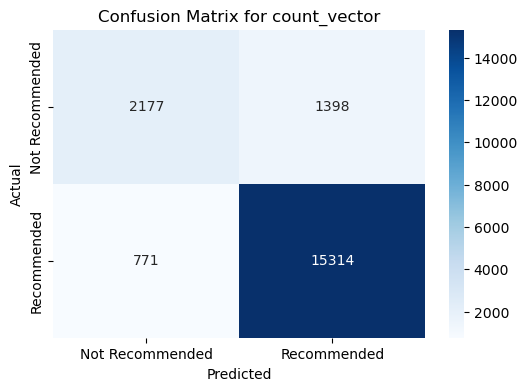

Evaluating model using unweighted_fasttext...


C:\Users\sowmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sowmi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

unweighted_fasttext - Accuracy: 0.8710, Precision: 0.8937, Recall: 0.9561, F1 Score: 0.9238


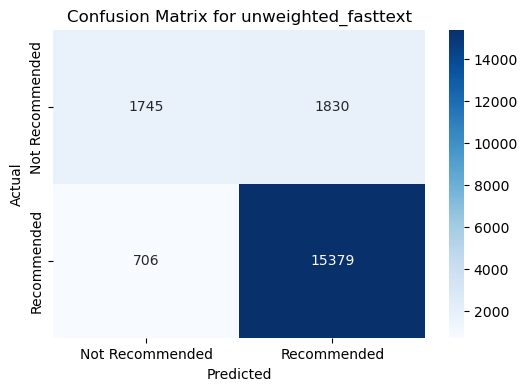

Evaluating model using tfidf_fasttext...
tfidf_fasttext - Accuracy: 0.8594, Precision: 0.8813, Recall: 0.9571, F1 Score: 0.9176


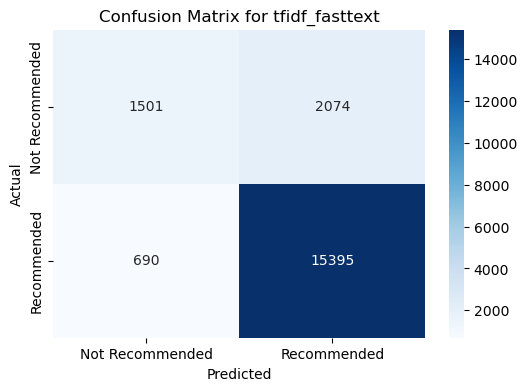

In [170]:
# Classification 

# count vector is converted to a dense matrix (if it's in sparse format)
count_vector_dense_com = count_features_com.toarray() if hasattr(count_features_com, 'toarray') else count_features_com

# Feature sets for the logistic regression model
feature_sets = {
    'count_vector': count_vector_dense_com,               
    'unweighted_fasttext': doc_vec_unweighted_com,  
    'tfidf_fasttext': tfidf_weighted_vectors_com        
}

# Labels for the recommendation (0 or 1)
labels = data_['Recommended IND']

# Call the method to evaluate the model on each feature set
evaluate_model(feature_sets, labels)

* Count vector model delivers strong overall performance with a high balance of precision and recall. It demonstrates a good ability to correctly identify "recommended" reviews while maintaining a relatively low rate of false positives (1,398).
* The unweighted FastText model performs similarly to the count vector model but with slightly lower precision and accuracy. It still achieves high recall, which indicates strong performance in identifying "recommended" reviews, but it has a higher number of false positives (1,842).
* The TF-IDF weighted FastText model shows slightly lower precision and accuracy compared to the unweighted version, but it maintains a strong recall rate. This model has a higher number of false positives (2,062), which suggests it struggles more in correctly classifying the "not recommended" reviews.
* All three models show strong recall, meaning they are highly capable of identifying "recommended" reviews. The Count Vector Model has the best overall performance, with the highest precision and the fewest false positives. Both FastText models, while still performing well, demonstrate slightly lower precision and higher false positive rates, especially in the case of the TF-IDF weighted version. Improvements in precision could further enhance the performance of the FastText models, particularly in reducing the misclassification of "not recommended" reviews.

##### With respect to the question, does more information improve accuracy?

<table>
  <tr>
    <th>Column chosen</th>
    <th>Feature Set</th>
    <th>Accuracy</th>
    <th>Precision</th>
    <th>Recall</th>
    <th>F1 Score</th>
  </tr>
  <tr>
    <td>Review Text</td>
    <td>count_vector</td>
    <td>0.8753</td>
    <td>0.9032</td>
    <td>0.9492</td>
    <td>0.9257</td>
  </tr>
  <tr>
    <td>Review Text</td> 
    <td>unweighted_fasttext</td>
    <td>0.8180</td>
    <td>0.8200</td>
    <td>0.9961</td>
    <td>0.8995</td>
  </tr>
  <tr>
    <td>Review Text</td>
    <td>tfidf_fasttext</td>
    <td>0.8427</td>
    <td>0.8612</td>
    <td>0.9629</td>
    <td>0.9092</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>count_vector</td>
    <td>0.8547</td>
    <td>0.8696</td>
    <td>0.9605</td>
    <td>0.9128</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>unweighted_fasttext</td>
    <td>0.7918</td>
    <td>0.7930</td>
    <td>0.9974</td>
    <td>0.8835</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>tfidf_fasttext</td>
    <td>0.7918</td>
    <td>0.7918</td>
    <td>1.0000</td>
    <td>0.8838</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>unweighted_fasttext (Tuned)</td>
    <td>0.7919</td>
    <td>0.7922</td>
    <td>0.9992</td>
    <td>0.8837</td>
  </tr>
  <tr>
    <td>Title</td>
    <td>tfidf_fasttext (Tuned)</td>
    <td>0.8297</td>
    <td>0.8536</td>
    <td>0.9474</td>
    <td>0.8980</td>
  </tr>
  <tr>
    <td>Review Text and Title</td>
    <td>count_vector</td>
    <td>0.8897</td>
    <td>0.9163</td>
    <td>0.9521</td>
    <td>0.9339</td>
  </tr>
  <tr>
    <td>Review Text and Title</td>
    <td>unweighted_fasttext</td>
    <td>0.8705</td>
    <td>0.8930</td>
    <td>0.9562</td>
    <td>0.9236</td>
  </tr>
  <tr>
    <td>Review Text and Title</td>
    <td>tfidf_fasttext</td>
    <td>0.8601</td>
    <td>0.8819</td>
    <td>0.9572</td>
    <td>0.9180</td>
  </tr>
</table>
819</td>
    <td>0.9572</td>
    <td>0.9180</td>
  </tr>
</table>
her rows -->
</table>




All the results for review text, title, and combined features were obtained using the same pre-training and vectorization techniques with the same parameters, except for the FastText model applied to the title column. When the FastText model was applied to the title column alone, it initially gave identical similarity scores for all words, indicating that the model wasn't capturing the nuances in the short text (title). After fine-tuning the FastText model by increasing the vector size, the model provided reasonable similarity scores. 

When comparing the performance of models using only the title, only the review text, and both combined:

* Review Text Alone: The review text alone provided good classification performance, with the count vector representation giving an accuracy of 0.8753, and the unweighted FastText and tf-idf FastText representations achieving decent accuracy (0.8180 and 0.8427, respectively).
* Title Alone: Initially, the title column alone performed slightly worse than the review text alone, especially when using the unweighted FastText model, but after fine-tuning, the accuracy improved. The fine-tuned FastText model on the title alone resulted in an accuracy of 0.8297. However, even with the improvement, the title alone generally had lower performance compared to using the review text alone.
* Combined Title and Review Text: The combination of both title and review text provided the highest classification performance across all models. The combined count vector achieved the highest accuracy of 0.8897, and FastText-based models also showed improvements (unweighted FastText: 0.8705, tf-idf FastText: 0.8601). This indicates that using both the title and review text leads to better model performance.

In conclusion, yes, adding more information (i.e., combining both title and review text) does provide higher accuracy. The results show that models using both features outperform those using only the review text or only the title. This demonstrates that additional context from both the title and the detailed review text helps the model make more accurate predictions.

## Summary
In Task 2, different feature representations were generated for the clothing reviews, including count vectors and word embeddings using both unweighted and TF-IDF weighted FastText models. These representations provided a foundation for machine learning models in Task 3, where the goal was to classify whether an item review recommended the product or not. Task 3 explored model performance using individual and combined features (review text and title) and involved comparing results across various feature representations.

A key challenge encountered was difficulties in fine-tuning the FastText model, especially for the title column, where initial word similarities showed poor variation. Increasing the vector size helped resolve this issue at first but it didn't perform well later. Additionally, there were difficultiles because of the imbalance in row counts after pre-processing, particularly with the review title column, which led to dropped rows and a mismatch in the dataset sizes. To overcome this, the title and review text were concatenated for combined feature analysis. 

Another significant struggle was with the unweighted document vector generation method (gen_docVecs_unw). Initially, this was implemented using a pandas DataFrame, which caused a significant performance bottleneck, resulting in that particular code alone taking nearly an hour to execute. To optimize performance, the implementation was switched to numpy arrays, which drastically reduced the execution time to less than 2 minutes. Overall, the combination of both review text and title, along with these optimizations, provided a balanced representation for more accurate and efficient classifications.

##### Note:
Faced ImportError: cannot import name 'triu' from 'scipy.linalg' (C:\Users\sowmi\anaconda3\Lib\site-packages\scipy\linalg\__init__.py) for scipy version from 1.13. So, downgraded the scipy version to 1.12.0. 

## References
- https://docs.python.org/3/library/ast.html
- https://radimrehurek.com/gensim/models/keyedvectors.html
- https://stackoverflow.com/questions/78279136/importerror-cannot-import-name-triu-from-scipy-linalg-when-importing-gens
- Week 8 and Week 9 class materials